## 1. Importing Libraries and reading the data

In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# setting options to view large data

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
# Read the current application csv file

curr_appl_data = pd.read_csv("application_data.csv")

## 2. Performing Descriptive Analysis on the Raw Data

In [5]:
# Check the number of rows and columns in the dataframe

curr_appl_data.shape

(307511, 122)

In [6]:
# Check the column-wise info of the dataframe

curr_appl_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [7]:
# Sorting the columns to check the null %

((curr_appl_data.isnull().sum()/curr_appl_data.index.size)*100).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

## 3. Filling NA values and dropping columns

In [8]:
# Accessing columns where there are more than 40% null values
dropColList = []
dropColList = list(curr_appl_data.columns[((curr_appl_data.isnull().sum()/curr_appl_data.index.size)*100) >= 40])

In [9]:
# Appending columns from current application data to drop list, which we felt are not relevant.

dropColList.extend(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                   'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
                   'AMT_REQ_CREDIT_BUREAU_YEAR'])


In [10]:
# Checking the drop list variable

dropColList

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [11]:
# Checking Value counts for columns which have very few discrete values to come to a conclusion for relevance
#Fetching records where there is payment difficulty i.e target variable = 1

curr_appl_data_payDifficulties = curr_appl_data[curr_appl_data['TARGET'] == 1]

In [12]:
# Checking the Contact or WorkAddress related columns value counts against target Variable . 
# Checking for records only where there is payment difficulty i.e target = 1

columns_list = ['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']



finalDFWorkAddress = pd.DataFrame()
for i in columns_list:
    Scheck = curr_appl_data_payDifficulties[i].value_counts(normalize=True)
    finalDFWorkAddress.loc[:, i] = Scheck
    
finalDFWorkAddress



,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,0.982558,0.944089,0.957462,0.881611,0.69708,0.778328
1,0.017442,0.055911,0.042538,0.118389,0.30292,0.221672


In [13]:
# Based on the above o/p we can drop the columns 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION' ,
# 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY' as most of the records have same value 

dropColList.extend(['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY'])


In [14]:
# Checking the Id proof/Documents submitted value counts against target Variable . 
# Checking for records only where there is payment difficulty i.e target = 1

DocumentsColumnList  = []
for i in curr_appl_data_payDifficulties.columns:
    if i.startswith('FLAG_DOCUMENT'):
        DocumentsColumnList.append(i)


finalDFDocumentFlag = pd.DataFrame()

for i in DocumentsColumnList:
    Scheck = curr_appl_data_payDifficulties[i].value_counts(normalize=True)
    finalDFDocumentFlag.loc[:, i] = Scheck
    
finalDFDocumentFlag



,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0.999839,0.222075,1.0,0.985015,0.939295,0.999879,0.926042,0.997019,1.0,0.996979,1.0,0.998792,0.998792,0.999557,0.993958,0.999919,0.99428,0.999517,0.999476,0.999436
1,0.000161,0.777925,NaN,0.014985,0.060705,0.000121,0.073958,0.002981,NaN,0.003021,NaN,0.001208,0.001208,0.000443,0.006042,0.000081,0.00572,0.000483,0.000524,0.000564


In [15]:
# Based on the above output the Flag Document columns can be dropped as 
# almost all the FlagDocumentscolumns have value as 0 for nearly 99% of data. There is one column FLAG_DOCUMENT_3, which
# contradicts but as per the metadata also, there is no clear information about the type of documents.

dropColList.extend(DocumentsColumnList)

In [16]:
# Checking the Contact Details  value counts against target Variable . 
# Checking for records only where there is payment difficulty i.e target = 1

ContactFlagColumnsList = ['FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']

finalDFContactFlag = pd.DataFrame()

for i in ContactFlagColumnsList:
    Scheck = curr_appl_data_payDifficulties[i].value_counts(normalize=True)
    finalDFContactFlag.loc[:, i] = Scheck
    
finalDFContactFlag


,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL
1,0.879517,0.237825,0.998187,0.244955,0.055347
0,0.120483,0.762175,0.001813,0.755045,0.944653


In [17]:
# Based on above output Flag_Emp_Phone,FLAG_MOBIL,Flag_Cont_Mobile Can be dropped as the majority have the values as 1

dropColList.extend(['FLAG_EMP_PHONE','FLAG_MOBIL','FLAG_CONT_MOBILE'])

In [18]:
curr_appl_data_payDifficulties['FLAG_MOBIL'].value_counts(normalize=True)

1    1.0
Name: FLAG_MOBIL, dtype: float64

In [19]:
# Checking the drop list variable

dropColList

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [20]:
# Copying current application data to new dataframe.

loan_data = curr_appl_data.copy()

In [21]:
# checking the shape of dataframe

loan_data.shape

(307511, 122)

In [22]:
# Dropping the unnecessary columns from the dataframe

loan_data.drop(columns=dropColList,axis=1,inplace=True)

In [23]:
# checking the shape of dataframe

loan_data.shape

(307511, 40)

In [24]:
# Checking the null % of columns

# pd.options.display.max_rows = None
((loan_data.isnull().sum()/loan_data.index.size)*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
NAME_TYPE_SUITE                 0.420148
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
NAME_EDUCATION_TYPE             0.000000
NAME_INCOME_TYPE                0.000000
AMT_CREDIT                      0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
NAME_HOUSING_TYPE               0.000000
FLAG_OWN_REALTY                 0.000000
FLAG_OWN_CAR                    0.000000
CODE_GENDER                     0.000000
NAME_CONTRACT_TYPE              0.000000
TARGET                          0.000000
NAME_FAMILY_STATUS              0.000000
DAYS_REGISTRATIO

In [25]:
# Get the total count of null values for respective column in dataframe

loan_data.CNT_FAM_MEMBERS.isnull().sum()

2

In [26]:
# Checking the value counts for the respective columns

loan_data['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [27]:
# Replacing null values in Count of Family Members Column with Median Value

loan_data['CNT_FAM_MEMBERS'].fillna(loan_data['CNT_FAM_MEMBERS'].median(), inplace=True)

In [28]:
# re-verifying the total sum of null values within a column

loan_data.CNT_FAM_MEMBERS.isnull().sum()

0

In [29]:
# checking the data type of column

loan_data.CNT_FAM_MEMBERS.dtypes

dtype('float64')

In [30]:
# Converting the column to INT data type

loan_data['CNT_FAM_MEMBERS'] = loan_data['CNT_FAM_MEMBERS'].astype(int)

In [31]:
## Get the total count of null values for respective column in dataframe

loan_data['AMT_ANNUITY'].isnull().sum()

12

In [32]:
#### As the number of Records having Annuity Amount as null is very minimal
#### i.e 12 records of entire data set we can replace with median

loan_data['AMT_ANNUITY'].fillna(loan_data['AMT_ANNUITY'].median(), inplace=True)

In [33]:
# Get the total count of null values for respective column in dataframe

loan_data['AMT_GOODS_PRICE'].isnull().sum()

278

In [34]:
# Checking the % of null values

loan_data['AMT_GOODS_PRICE'].isnull().sum()/loan_data.shape[0]

0.0009040327012692228

In [35]:
#### As the number of Records having Goods Price Amount as null is very minimal 
#### we can replace with median

loan_data['AMT_GOODS_PRICE'].fillna(loan_data['AMT_GOODS_PRICE'].median(), inplace=True)

In [36]:
# Re-verifying the total sum of null values

loan_data['AMT_GOODS_PRICE'].isnull().sum()

0

In [37]:
# Checking the % of null values count for the columns in dataframe

((loan_data.isnull().sum()/loan_data.index.size)*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
NAME_TYPE_SUITE                 0.420148
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
DAYS_LAST_PHONE_CHANGE          0.000325
AMT_CREDIT                      0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_INCOME_TYPE                0.000000
AMT_GOODS_PRICE                 0.000000
AMT_ANNUITY                     0.000000
FLAG_OWN_REALTY                 0.000000
AMT_INCOME_TOTAL                0.000000
CNT_CHILDREN                    0.000000
NAME_HOUSING_TYPE               0.000000
FLAG_OWN_CAR                    0.000000
CODE_GENDER                     0.000000
NAME_CONTRACT_TYPE              0.000000
TARGET                          0.000000
NAME_FAMILY_STATUS              0.000000
DAYS_REGISTRATION               0.000000
REGION_POPULATIO

In [38]:
# Checking the value counts of a column

loan_data['FLAG_OWN_REALTY'].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [39]:
# Checking the value counts of a column

loan_data['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [40]:
# Checking for Columns Which have values as XNA . Here Gender Can be either Male or Female . 
# 4 records have value as XNA . As the mode is Female we can replace those 4 records value as F
# there wont be much impact

loan_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [41]:
# Replacing the XNA values with F

loan_data['CODE_GENDER'].replace('XNA','F', inplace=True)

In [42]:
# We can observe now the XNA values are replaced

loan_data.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [43]:
# Family Status of the Client Correction of Few Records. 2 Records have value Unknown
# This can be replaced by Mode value i.e Married. It wouldnt affect the analysis

loan_data.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [44]:
# Checking the mode of the column

loan_data.NAME_FAMILY_STATUS.mode()[0]

'Married'

In [45]:
# Replacing the value of column

loan_data['NAME_FAMILY_STATUS'].replace('Unknown',loan_data.NAME_FAMILY_STATUS.mode()[0], inplace=True)

In [46]:
# Now Recheck the Data if the records are cleansed

loan_data.NAME_FAMILY_STATUS.value_counts()

Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

In [47]:
# Checking the value counts of a column

loan_data['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [48]:
# Get the count of null values in a column

loan_data.OCCUPATION_TYPE.isnull().sum()

96391

In [49]:
# There are huge data having Occupation type as null, we cannot impute with the mode of this category a 
# it would lead us to a biased decision.So filling all na values in occupation type as Unknown

loan_data.OCCUPATION_TYPE.fillna('Unknown', inplace=True)

In [50]:
#  Get the value counts of a column

loan_data.OCCUPATION_TYPE.value_counts()

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [51]:
# Checking the null % of all columns in a dataframe

((loan_data.isnull().sum()/loan_data.index.size)*100).sort_values(ascending=False)

EXT_SOURCE_3                   19.825307
NAME_TYPE_SUITE                 0.420148
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
DAYS_LAST_PHONE_CHANGE          0.000325
AMT_CREDIT                      0.000000
NAME_FAMILY_STATUS              0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_INCOME_TYPE                0.000000
AMT_GOODS_PRICE                 0.000000
AMT_ANNUITY                     0.000000
FLAG_OWN_REALTY                 0.000000
AMT_INCOME_TOTAL                0.000000
CNT_CHILDREN                    0.000000
REGION_POPULATION_RELATIVE      0.000000
FLAG_OWN_CAR                    0.000000
CODE_GENDER                     0.000000
NAME_CONTRACT_TYPE              0.000000
TARGET                          0.000000
NAME_HOUSING_TYPE               0.000000
DAYS_REGISTRATION               0.000000
DAYS_BIRTH      

In [52]:
# Checking the total count of null values in a column

loan_data.NAME_TYPE_SUITE.isnull().sum()

1292

In [53]:
#  Get the value counts of a column

loan_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [54]:
# Get the mode of a column

loan_data.NAME_TYPE_SUITE.mode()[0]

'Unaccompanied'

In [55]:
# Filling Na values is NAME_TYPE_SUITE with mode

loan_data.NAME_TYPE_SUITE.fillna(loan_data.NAME_TYPE_SUITE.mode()[0], inplace=True)

In [56]:
# Re-verifying the total null value count of a column

loan_data.NAME_TYPE_SUITE.isnull().sum()

0

In [57]:
# dropping few more columns as seems irrelevant for analysis

loan_data.drop(columns=['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                           'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE'], inplace=True)

In [58]:
# we can drop EXT_SOURCE_2 and EXT_SOURCE_3 columns as well because we dont have any clear metadata as what its refering to.

loan_data.drop(columns=['EXT_SOURCE_2','EXT_SOURCE_3'], inplace=True)

In [59]:
# Checking the null % of columns in a dataframe

((loan_data.isnull().sum()/loan_data.index.size)*100).sort_values(ascending=False)

ORGANIZATION_TYPE              0.0
NAME_HOUSING_TYPE              0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
REGION_POPULATION_RELATIVE     0.0
LIVE_CITY_NOT_WORK_CITY        0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_WORK_PHONE                0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT

In [60]:
# Checking the shape of the dataframe

loan_data.shape

(307511, 33)

In [61]:
# Numerical Columns Available in loan_data dataframe

num_col = loan_data.describe().columns

In [62]:
# Creating Age Column based on Days_Birth

loan_data['Age'] = abs(round((loan_data['DAYS_BIRTH'].replace('-',''))/365,2)).astype(int)

In [63]:
# Creating Age Group Buckets 

loan_data['Age_Group'] = pd.cut(x=loan_data['Age'], bins=[20, 30, 40, 50, 60, 70], labels=['20 to 30', '31 to 40', '41 to 50', '51 to 60', '61 to 70']) 

In [64]:
loan_data.Age_Group.dtype

CategoricalDtype(categories=['20 to 30', '31 to 40', '41 to 50', '51 to 60', '61 to 70'], ordered=True)

In [65]:
# Get the top 5 records of dataframe

loan_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Age,Age_Group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,0,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,Business Entity Type 3,25,20 to 30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,0,1,0,Core staff,2,1,1,MONDAY,11,0,0,School,45,41 to 50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,Government,52,51 to 60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,0,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,Business Entity Type 3,52,51 to 60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,0,0,0,Core staff,1,2,2,THURSDAY,11,1,1,Religion,54,51 to 60


In [66]:
# convert the days employed to years and apply absolute function as its in negative form

loan_data['YearsWorked'] = abs(round((loan_data['DAYS_EMPLOYED'].replace('-',''))/365,2)).astype(int)

In [67]:
loan_data['YearsWorked'].value_counts(normalize=True)

1000    0.180072
1       0.103541
2       0.096390
0       0.090572
3       0.081626
4       0.070814
5       0.052961
6       0.048922
7       0.042805
8       0.037238
9       0.029183
10      0.023970
11      0.019199
12      0.017277
14      0.015125
13      0.014130
15      0.008891
16      0.007577
17      0.006536
18      0.006231
19      0.006084
20      0.005210
21      0.004754
22      0.004071
23      0.003314
24      0.002976
25      0.002670
27      0.002133
26      0.002124
28      0.001980
29      0.001847
30      0.001489
31      0.001418
34      0.001187
32      0.001141
33      0.001076
35      0.000832
36      0.000637
37      0.000452
39      0.000406
38      0.000377
40      0.000192
41      0.000192
42      0.000137
44      0.000098
43      0.000062
45      0.000049
48      0.000013
46      0.000013
49      0.000003
47      0.000003
Name: YearsWorked, dtype: float64

In [68]:
# Clearly we can see there is 1 outlier with years worked as 1000 which is erroneous
# We can replace this value with 1 as clearly a person cant work for 1000 years

loan_data['YearsWorked'] = loan_data['YearsWorked'].replace(1000,1)

In [69]:
loan_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Age,Age_Group,YearsWorked
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,0,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,Business Entity Type 3,25,20 to 30,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,0,1,0,Core staff,2,1,1,MONDAY,11,0,0,School,45,41 to 50,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,Government,52,51 to 60,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,0,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,Business Entity Type 3,52,51 to 60,8
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,0,0,0,Core staff,1,2,2,THURSDAY,11,1,1,Religion,54,51 to 60,8


In [70]:
# Category Columns Available in loan_data Dataframe
cat_cols = loan_data.select_dtypes(include=['object']).columns
cat_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [71]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

### Data Imbalance

In [72]:
# checking for data imbalance

loan_data.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [73]:
# As majority of data of data belong to Target 0 and very less to Target 1, it depicts that there is a data imbalance.
# Calculating data imbalance ratio

round(len(loan_data[loan_data.TARGET==0]) / len(loan_data[loan_data.TARGET==1]),2)

11.39

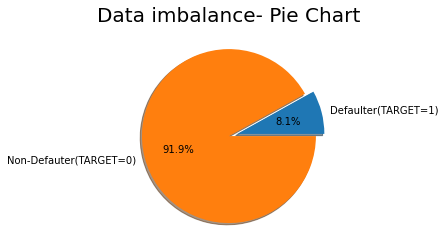

In [74]:
x = ['Defaulter(TARGET=1)','Non-Defauter(TARGET=0)']
y = [len(loan_data[loan_data.TARGET==1]), len(loan_data[loan_data.TARGET==0])]
plt.pie(y, data=loan_data.TARGET, labels=x, autopct='%1.1f%%', shadow=True, explode= (0.1, 0))
plt.title('Data imbalance- Pie Chart',fontdict={'fontsize':20})
plt.show()

In [75]:
# Dividing the dataset for target=1(client with payment difficulties) and target=0(all other)

loan_data_Target0=loan_data.loc[loan_data["TARGET"]==0]
loan_data_Target1=loan_data.loc[loan_data["TARGET"]==1]

### Univariate Analysis of Categorical columns

In [76]:
##### Creating a userDefined function which is used for all Categorical Variable Analysis

def plot_func(dataframe,dim):
    fig = plt.figure(figsize=(13,10))
    ax1 = plt.subplot(221)
    dataframe[dim].value_counts().plot.pie(autopct = "%1.0f%%" , ax = ax1)
    plt.title("Plotting data for the dimension " + dim)
    ax2 = plt.subplot(222)
    sns.countplot(x=dim,hue='TARGET',data=dataframe,ax=ax2)
    plt.xticks(rotation=90)
    plt.title("Plotting data for target in terms of total count")
    ax3 = plt.subplot(223)
    df=pd.DataFrame()
    df['0'] = ((loan_data_Target0[dim].value_counts())/len(loan_data_Target0))
    df['1'] = ((loan_data_Target1[dim].value_counts())/len(loan_data_Target1))
    df.plot.bar(ax=ax3)
    plt.title("Plotting data in terms of percentage")
    fig.tight_layout()
    plt.show()

*************** Plot for  NAME_CONTRACT_TYPE  ***************


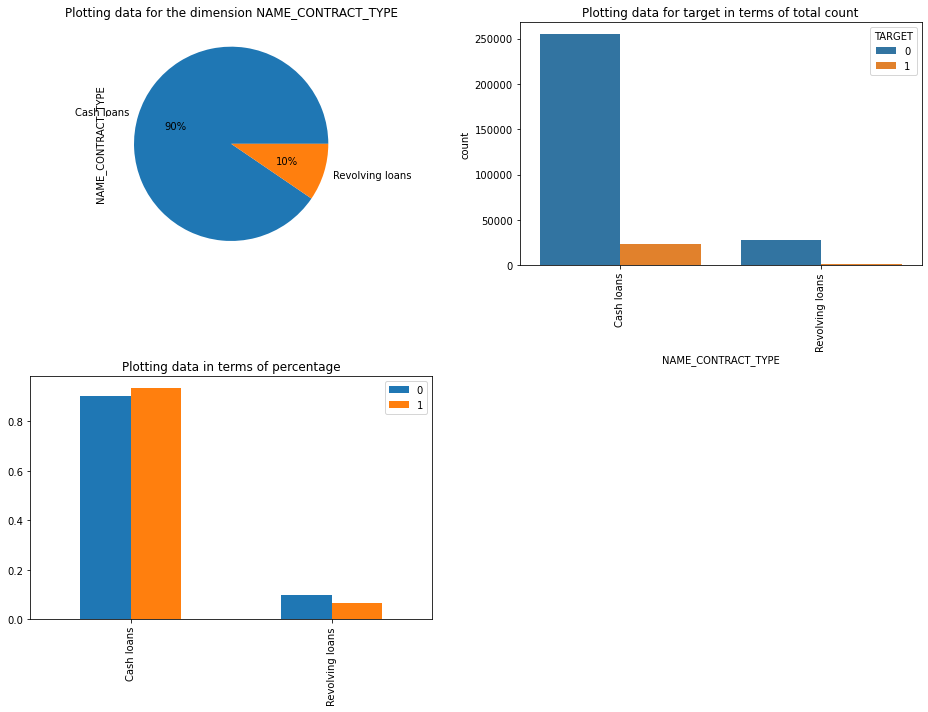

*************** Plot for  CODE_GENDER  ***************


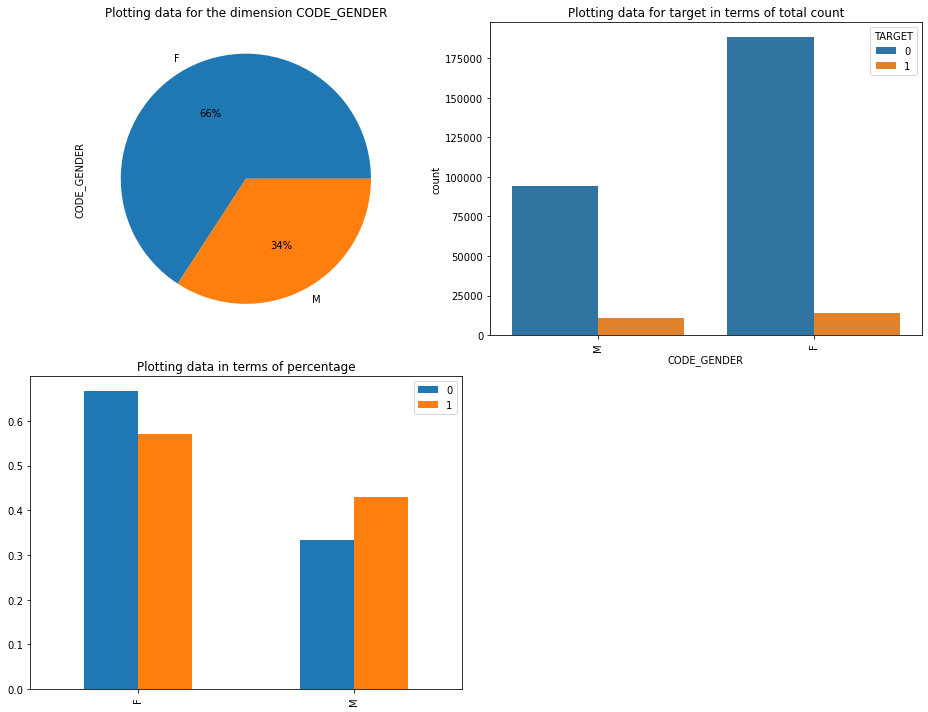

*************** Plot for  FLAG_OWN_CAR  ***************


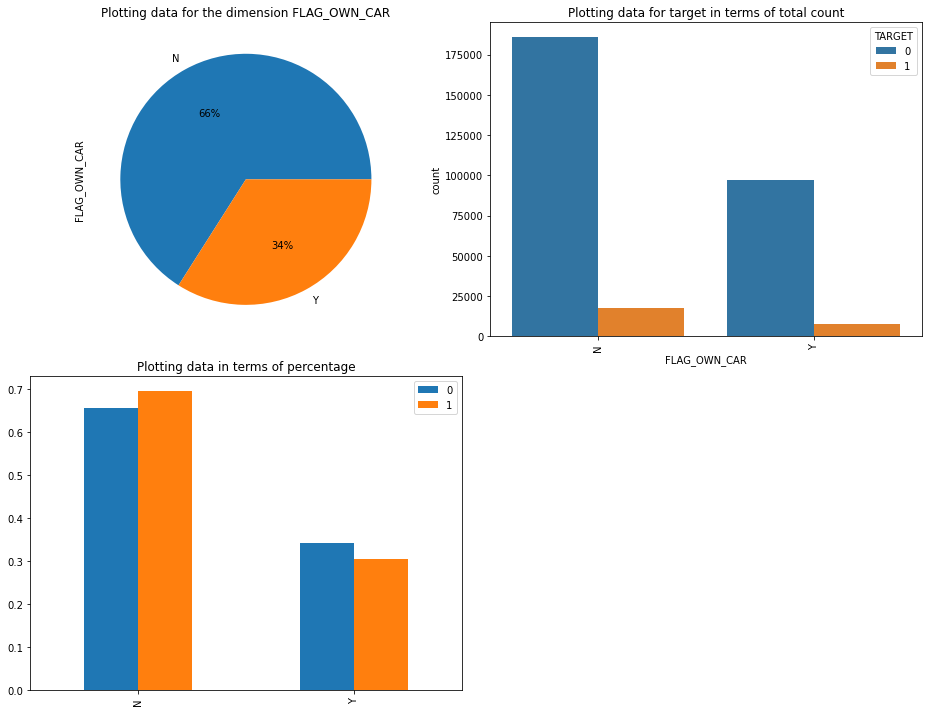

*************** Plot for  FLAG_OWN_REALTY  ***************


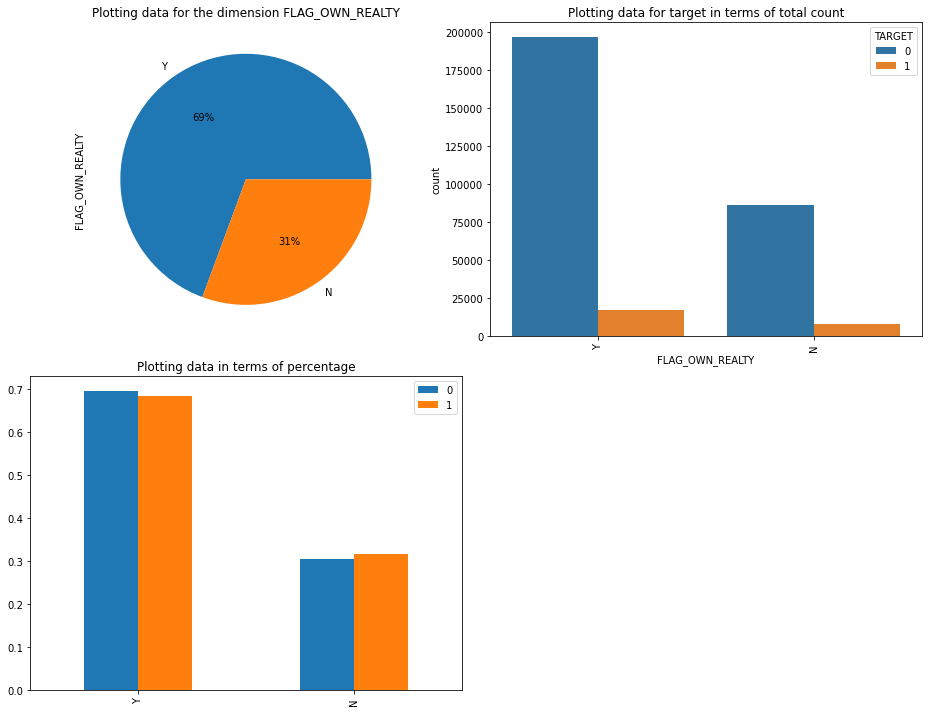

*************** Plot for  NAME_TYPE_SUITE  ***************


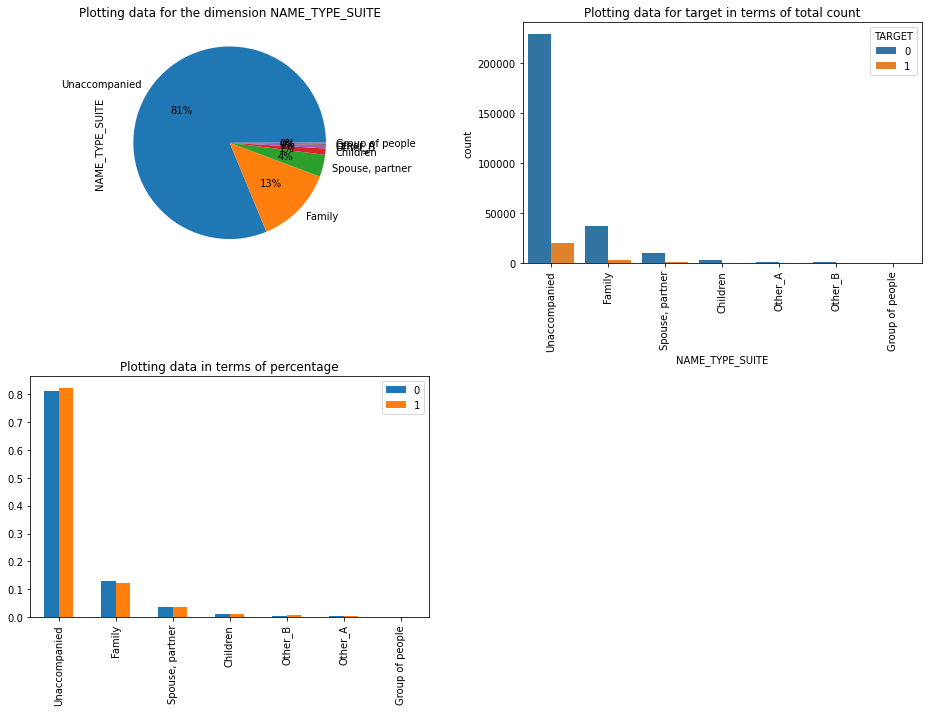

*************** Plot for  NAME_INCOME_TYPE  ***************


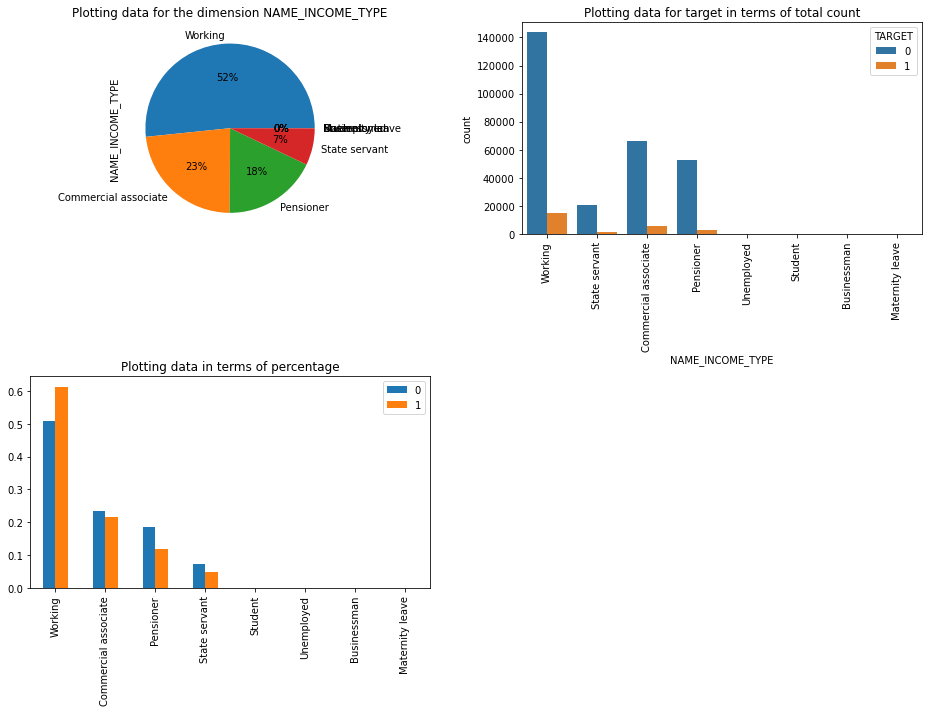

*************** Plot for  NAME_EDUCATION_TYPE  ***************


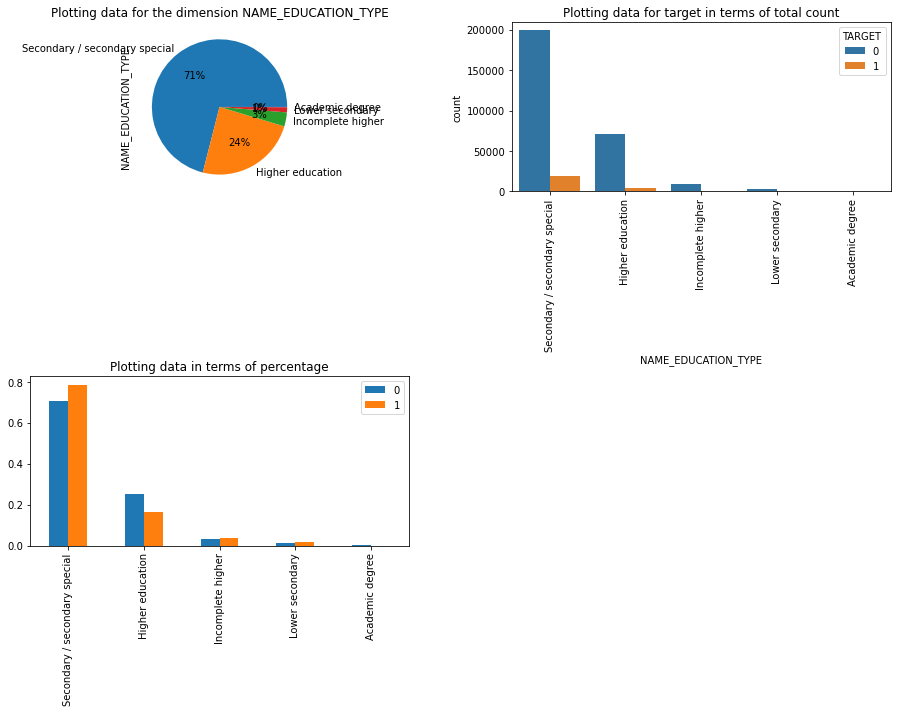

*************** Plot for  NAME_FAMILY_STATUS  ***************


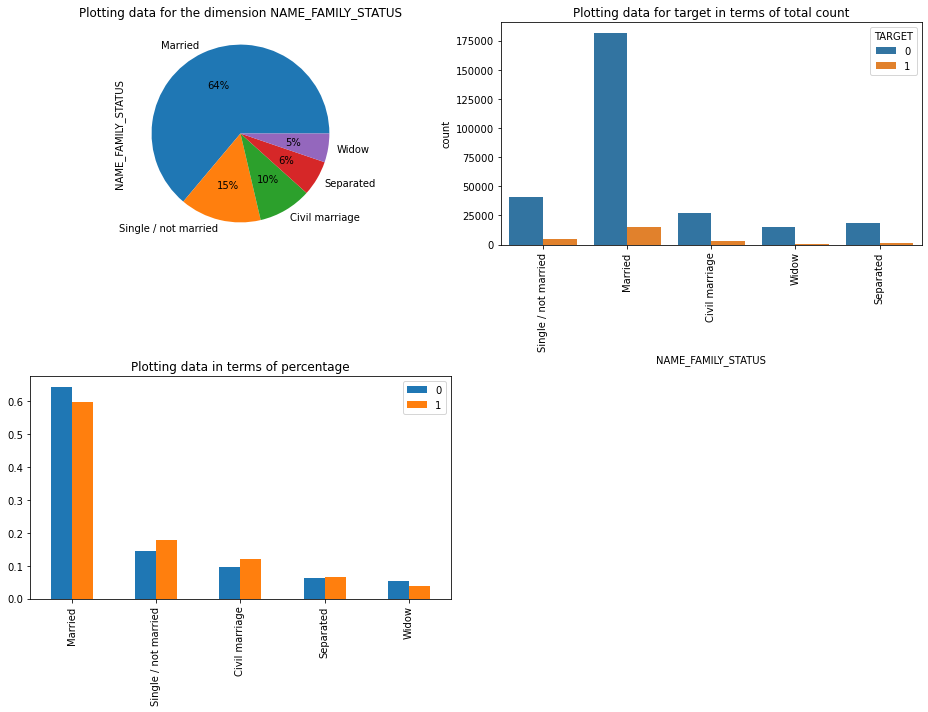

*************** Plot for  NAME_HOUSING_TYPE  ***************


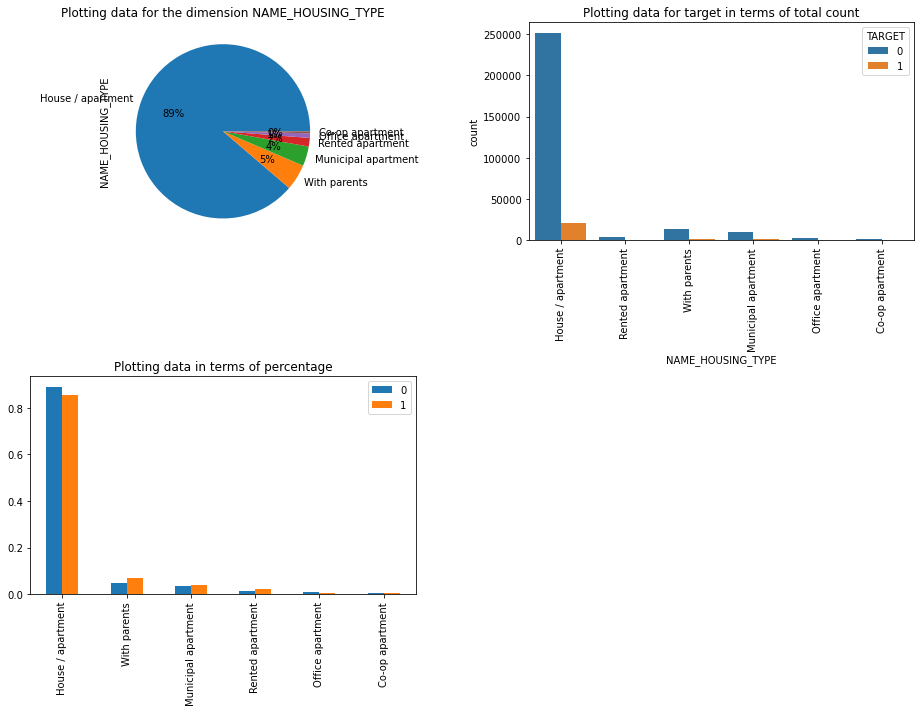

*************** Plot for  OCCUPATION_TYPE  ***************


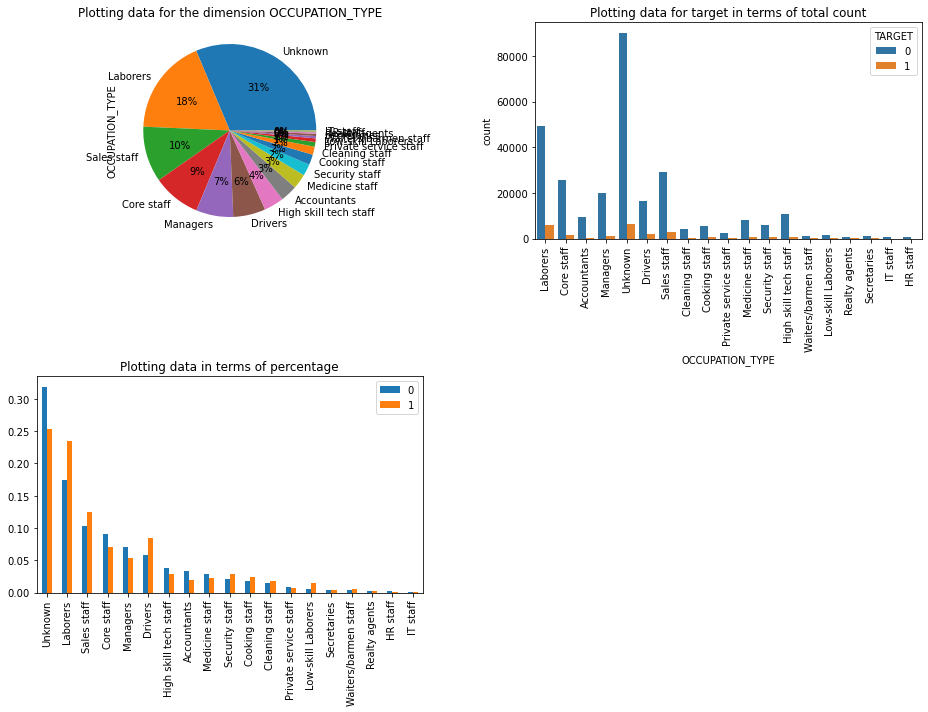

*************** Plot for  WEEKDAY_APPR_PROCESS_START  ***************


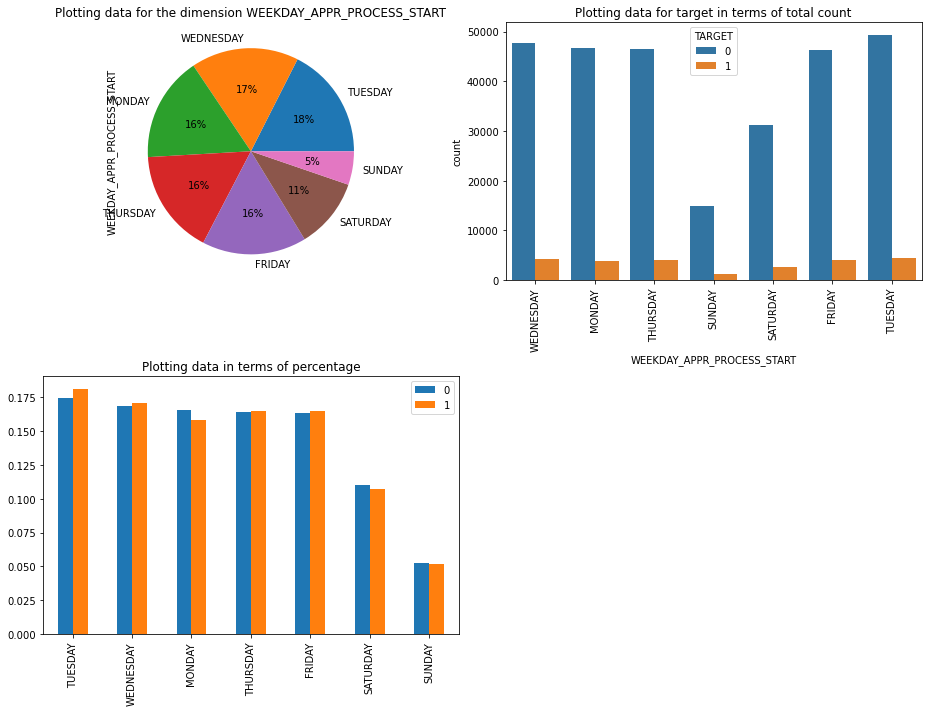

*************** Plot for  ORGANIZATION_TYPE  ***************


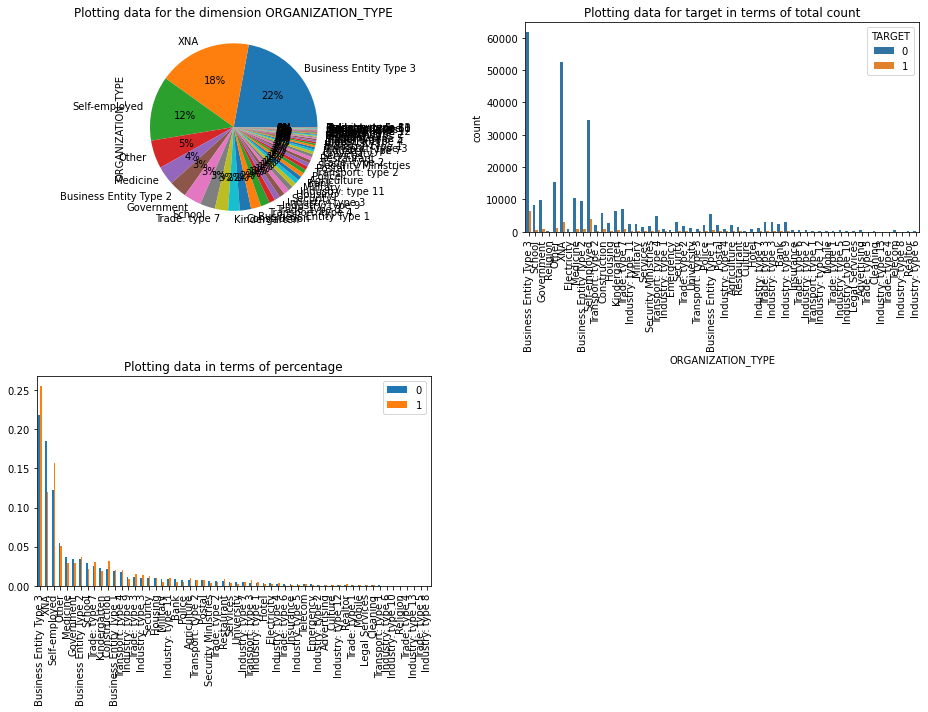

In [77]:
for col in cat_cols:
    print('*************** Plot for ',col,' ***************')
    plot_func(loan_data,col)

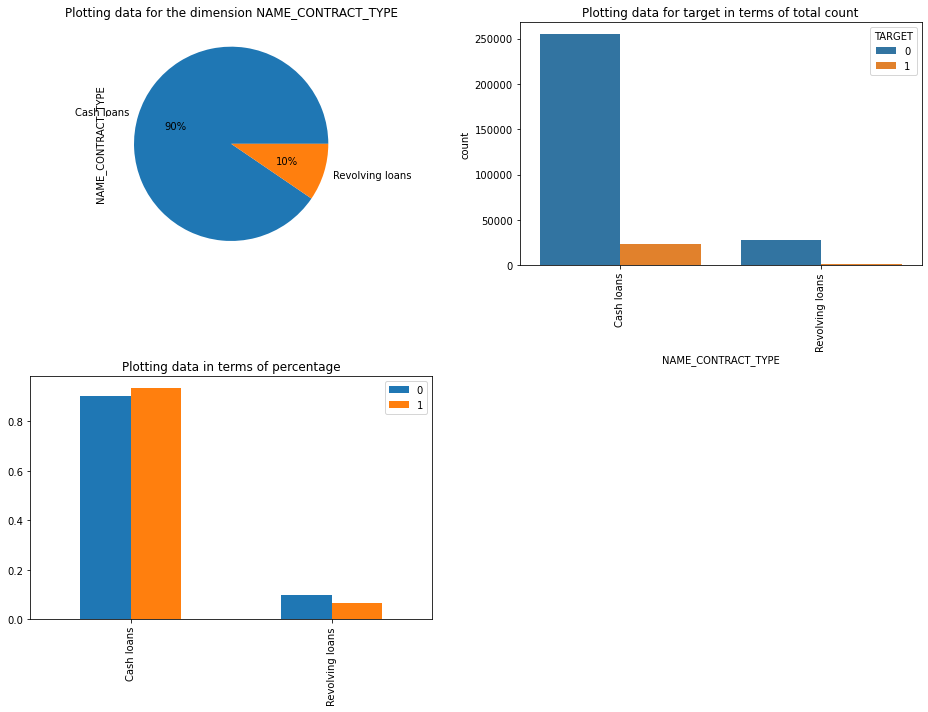

In [78]:
plot_func(loan_data,'NAME_CONTRACT_TYPE')

Bank is primarily providing 2 types of loans : Cash & Revolving . Majority of the loans are cash loans.
Comparatively Cash loans taken by clients are facing bit more difficulties than revolving loans


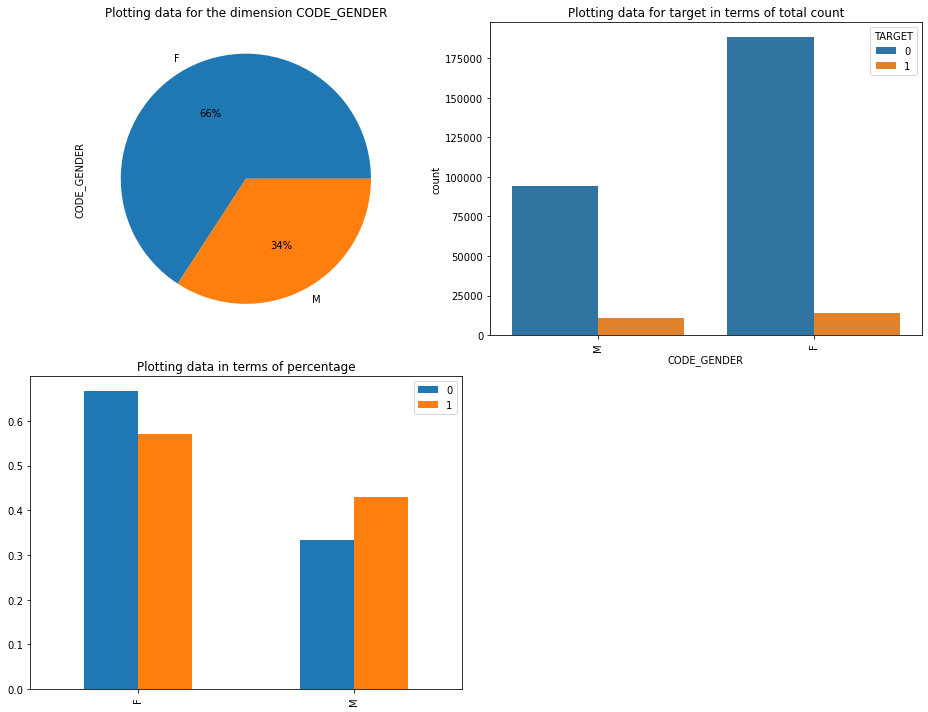

In [79]:
plot_func(loan_data,'CODE_GENDER')

% for loan is more for Females and  males are  having more paying difficulties as compared to Female.

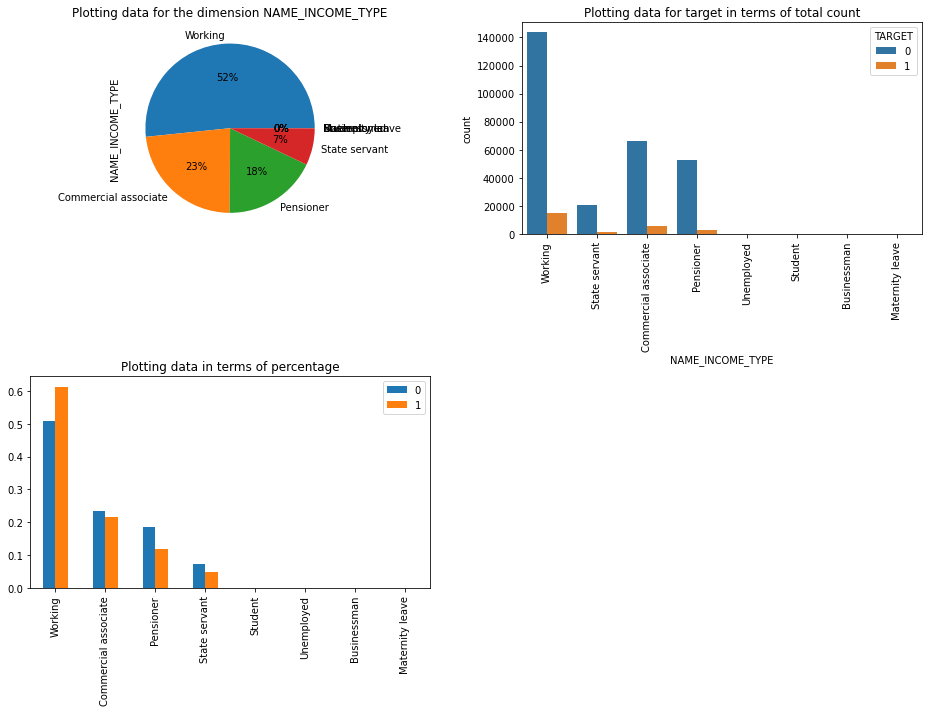

In [80]:
plot_func(loan_data,'NAME_INCOME_TYPE')

Its clearly depicted that working people are facing more difficulties when compared to other income type guys

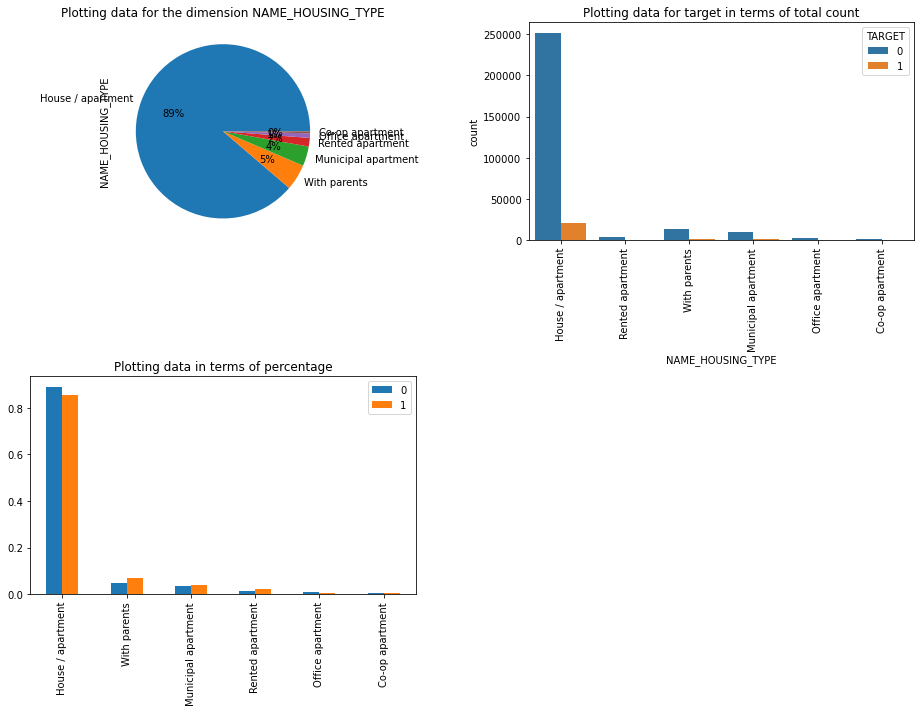

In [81]:
plot_func(loan_data,'NAME_HOUSING_TYPE')

Clients living with parents are facing more difficulties . Probably their income needs to be shared to their medical/other expenses

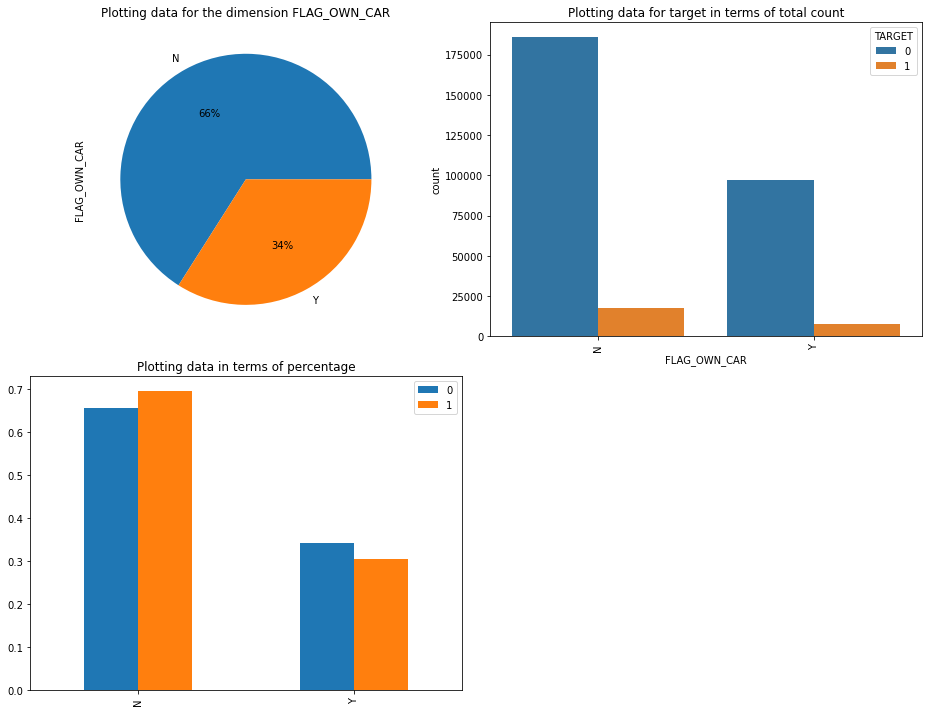

In [82]:
plot_func(loan_data,'FLAG_OWN_CAR')

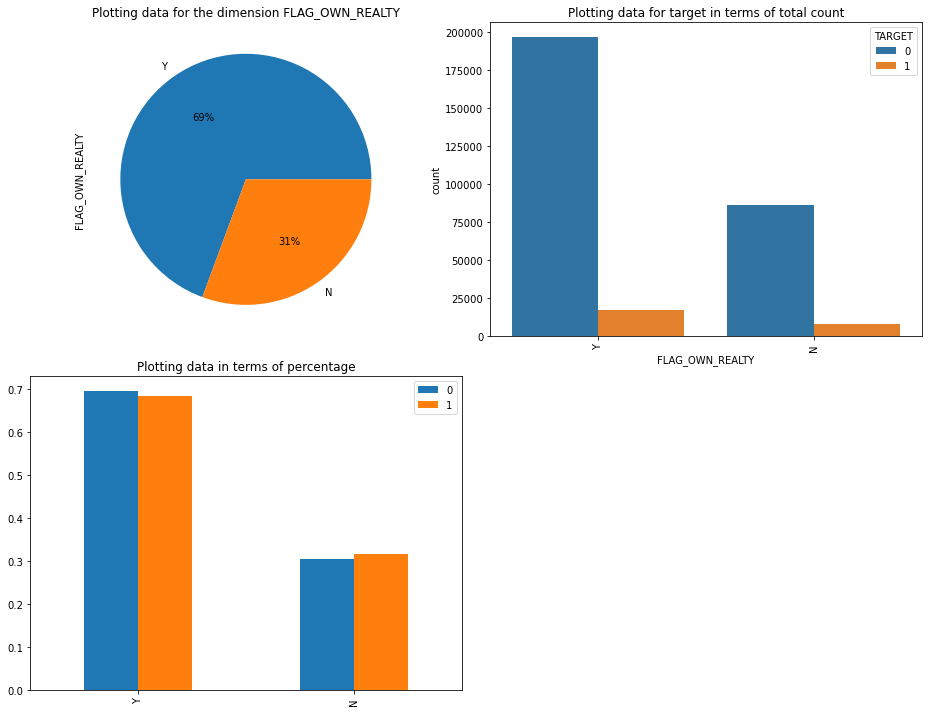

In [83]:
plot_func(loan_data,'FLAG_OWN_REALTY')

As per above Graphs clients already possessing a car/real estate property are having comparatively less difficulties. It indicates that they are already in a good financial position and able to pay the instalments on time

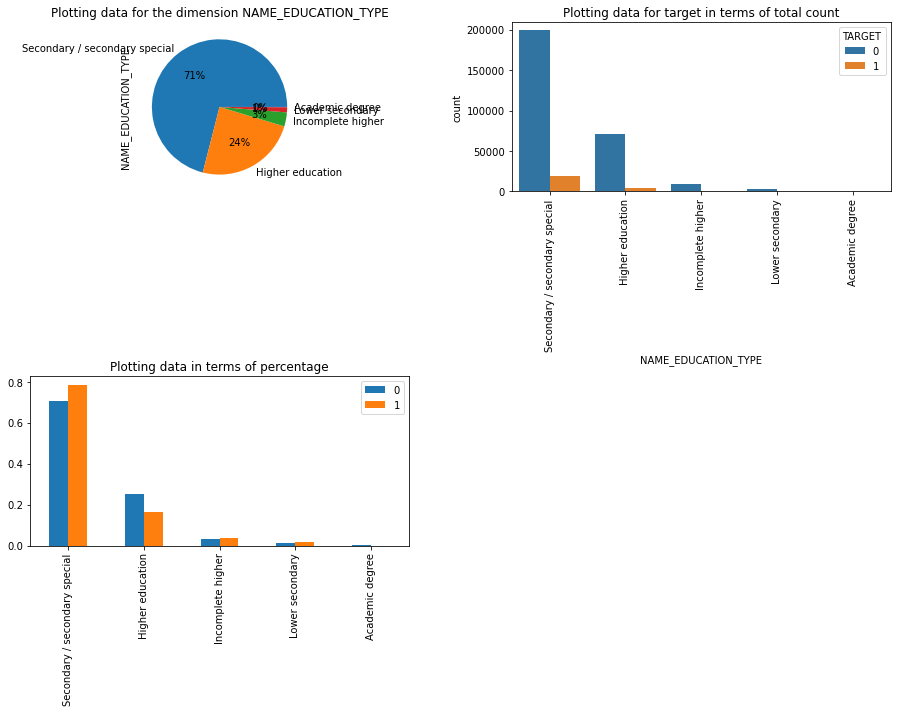

In [84]:
plot_func(loan_data,'NAME_EDUCATION_TYPE')

Higher education people have less paying difficulties as comapred to Secondary/secondary special.

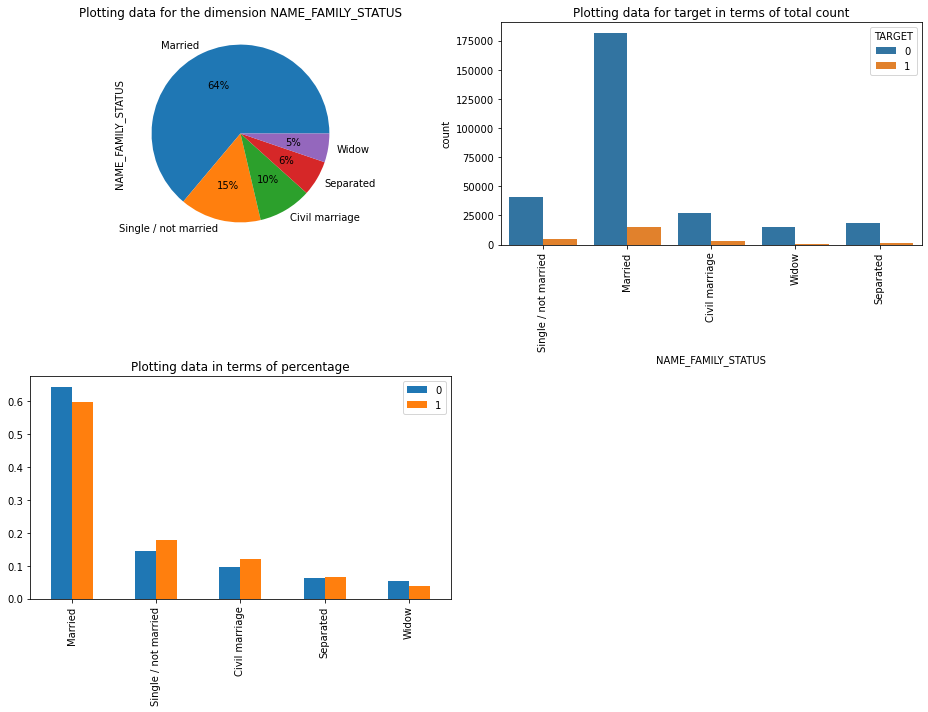

In [85]:
plot_func(loan_data,'NAME_FAMILY_STATUS')

Single/not-married people facing more paying difficulties as comapred to Married people. This could be due to married people may have dual source of income.

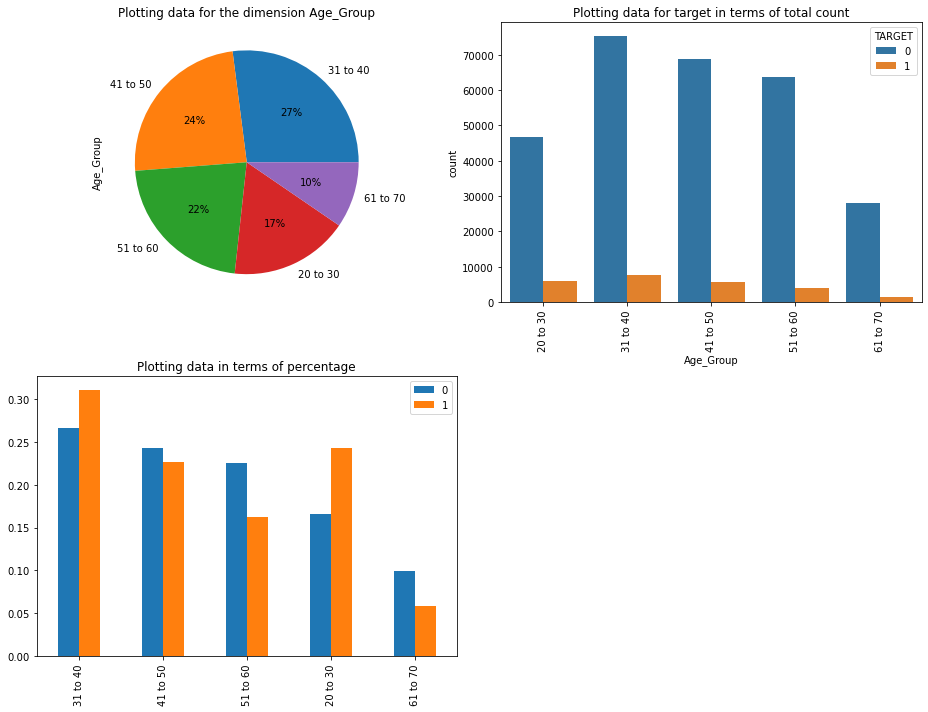

In [86]:
#### Plotting for Age Group:
plot_func(loan_data,'Age_Group')

Old age people are not having payment difficulties i.e in age group between 41 to 70
Where as Age group between 20 to 30 are facing payment difficulties.

### Univariate Analysis and Outliers for Numerical columns

Box Plot for  SK_ID_CURR


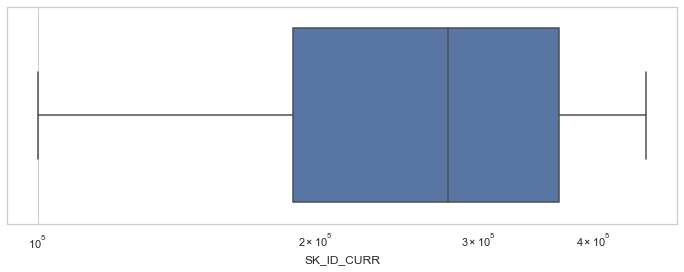


Box Plot for  TARGET


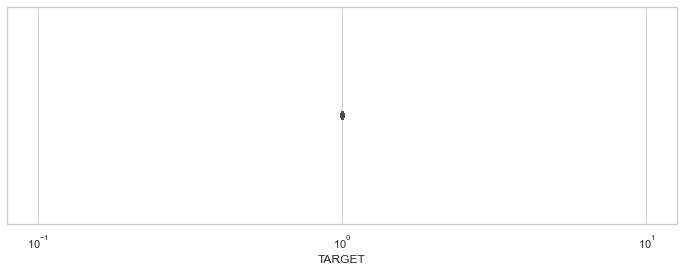


Box Plot for  CNT_CHILDREN


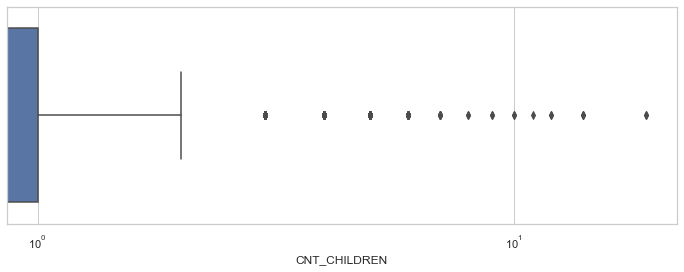


Box Plot for  AMT_INCOME_TOTAL


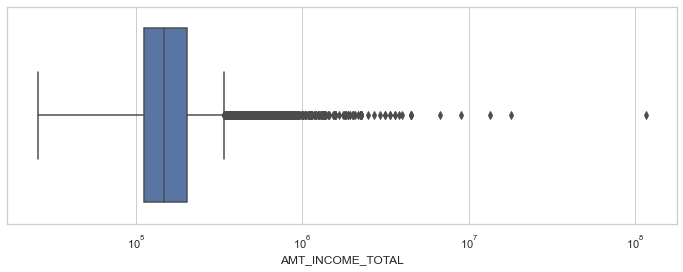


Box Plot for  AMT_CREDIT


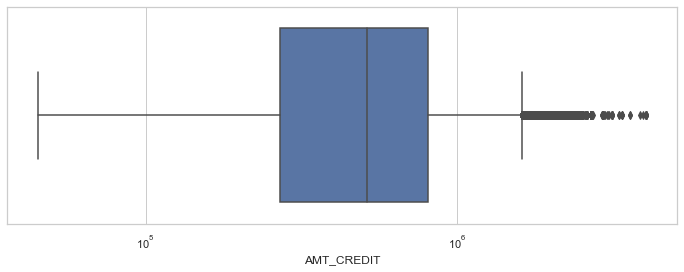


Box Plot for  AMT_ANNUITY


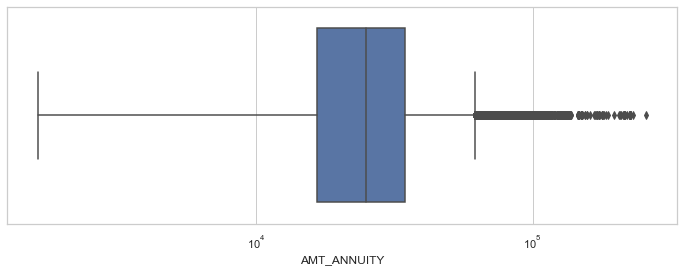


Box Plot for  AMT_GOODS_PRICE


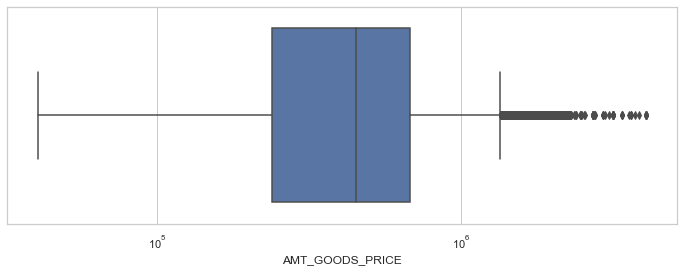


Box Plot for  REGION_POPULATION_RELATIVE


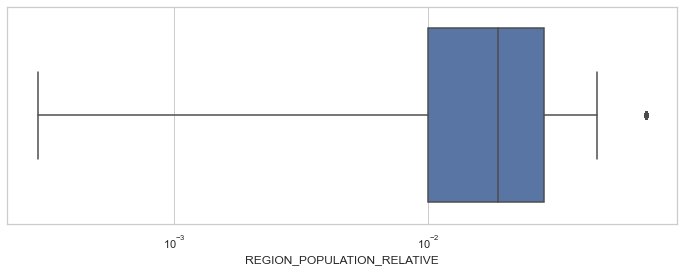


Box Plot for  DAYS_BIRTH


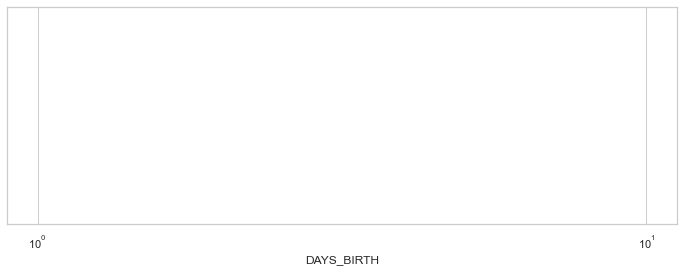


Box Plot for  DAYS_EMPLOYED


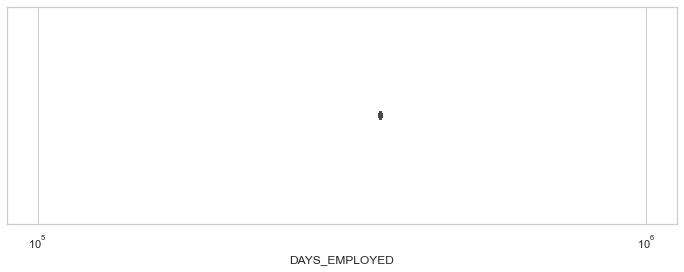


Box Plot for  DAYS_REGISTRATION


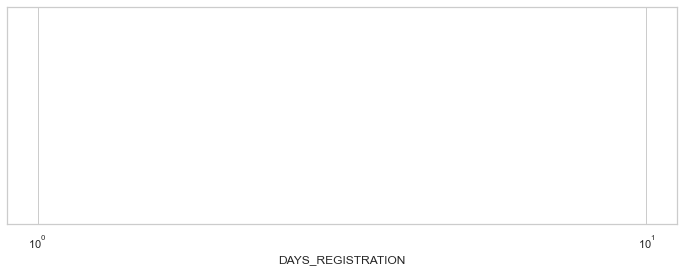


Box Plot for  DAYS_ID_PUBLISH


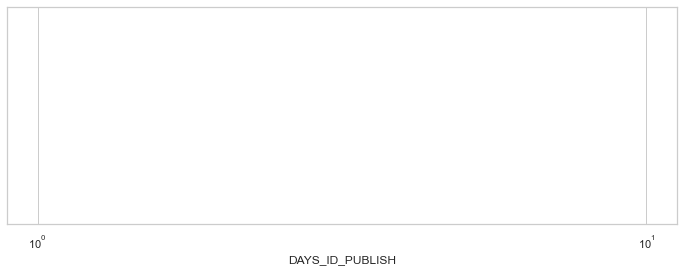


Box Plot for  FLAG_WORK_PHONE


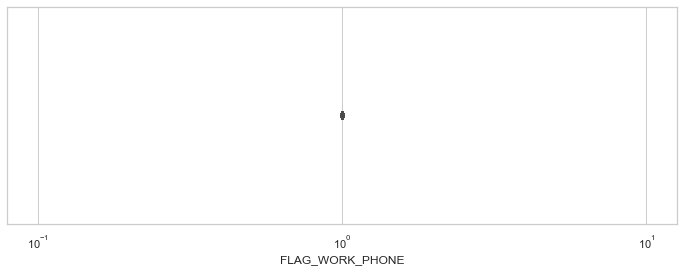


Box Plot for  FLAG_PHONE


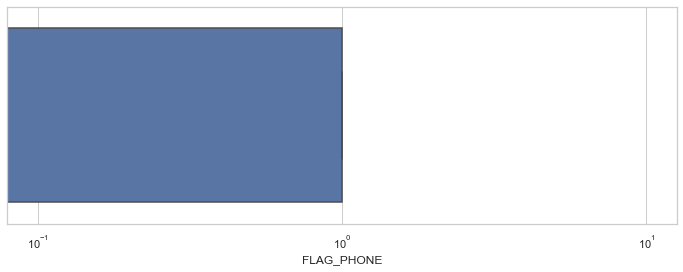


Box Plot for  FLAG_EMAIL


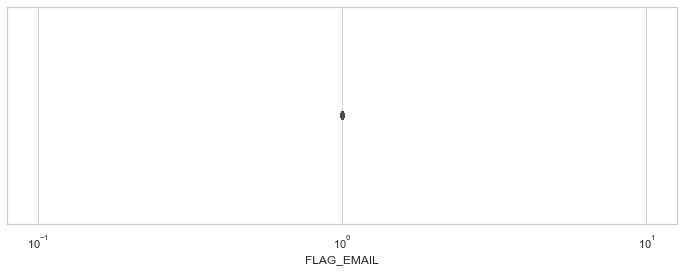


Box Plot for  CNT_FAM_MEMBERS


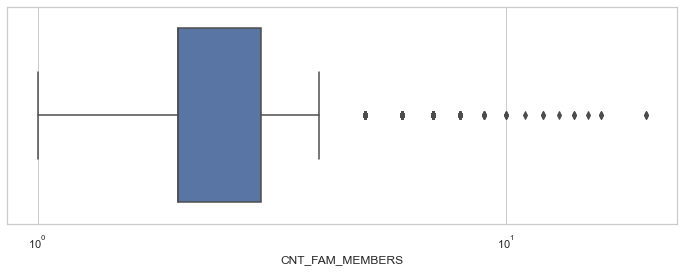


Box Plot for  REGION_RATING_CLIENT


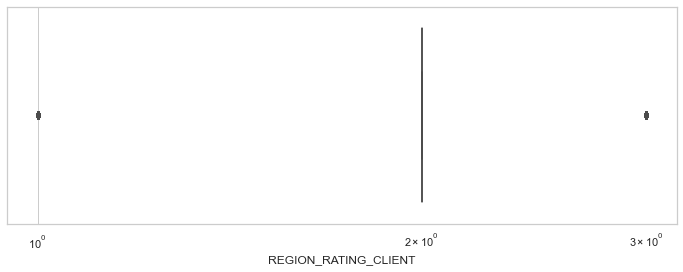


Box Plot for  REGION_RATING_CLIENT_W_CITY


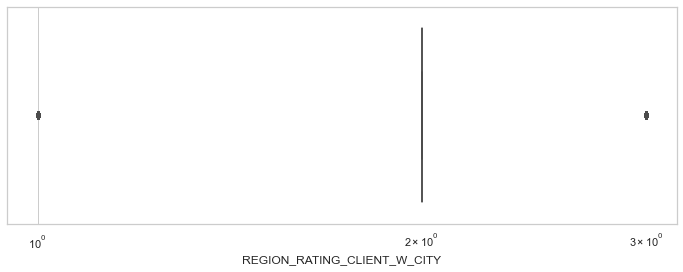


Box Plot for  HOUR_APPR_PROCESS_START


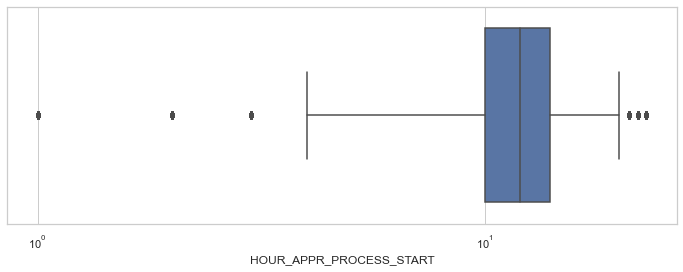


Box Plot for  REG_CITY_NOT_WORK_CITY


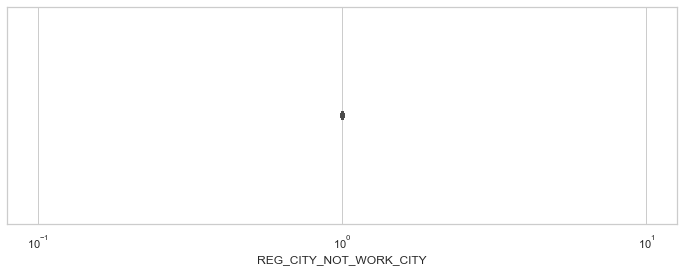


Box Plot for  LIVE_CITY_NOT_WORK_CITY


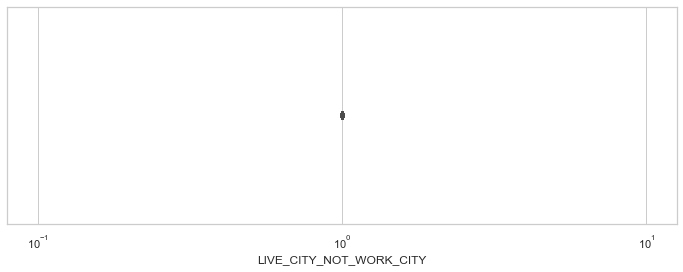

In [87]:
##### Plotting box plots for all numerical columns 
for col in num_col:
    print('Box Plot for ',col)
    plt.figure(figsize=[12,4])
    sns.set(style='whitegrid')
    plt.xscale('log')
    sns.boxplot(data =loan_data, x=col,orient='v')
    plt.show()
    print()

CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE ,DAYS_EMPLOYED are few columns which has outliers. Above box plot shows few data points which are outside the Interquartile region.

In [88]:
#### Correcting the outliers in data 
#### Anything above 1.5 * 75 percentile Can be considered as a suspected outlier

outlier = np.percentile(loan_data.AMT_INCOME_TOTAL,75) * 1.5

#### Fetching data less than outlier into another dataframe

loan_data_correctedIncome = loan_data[loan_data['AMT_INCOME_TOTAL'] < outlier]
loan_data_correctedIncomeTarget1 = loan_data_correctedIncome[loan_data_correctedIncome['TARGET'] == 1]



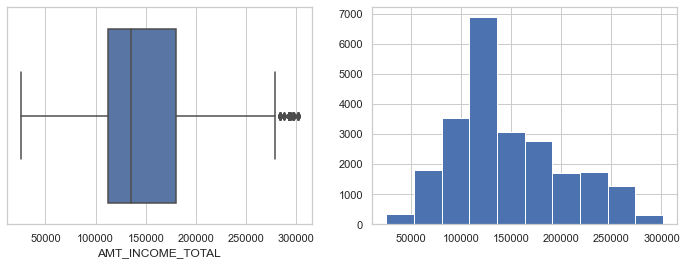

In [89]:
######Plotting the data to see the Income Range of Defaulters
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
sns.boxplot(loan_data_correctedIncomeTarget1['AMT_INCOME_TOTAL'],orient='v')
plt.subplot(1,2,2)
plt.hist(x=loan_data_correctedIncomeTarget1['AMT_INCOME_TOTAL']);
plt.show()

###### clients having income between 100000 to 150000 are the segment with more clients facing payment difficulties

In [90]:
#### Correcting the outliers in data for CRedit Amount 
#### Anything above 1.5 * 75 percentile Can be considered as a suspected outlier

outlier_creditAmt = np.percentile(loan_data.AMT_CREDIT,75) * 1.5

#### Fetching data less than outlier into another dataframe

loan_data_correctedCreditAmt = loan_data[loan_data['AMT_CREDIT'] < outlier_creditAmt]
loan_data_correctedCreditAmtTarget1 = loan_data_correctedCreditAmt[loan_data_correctedCreditAmt['TARGET'] == 1]

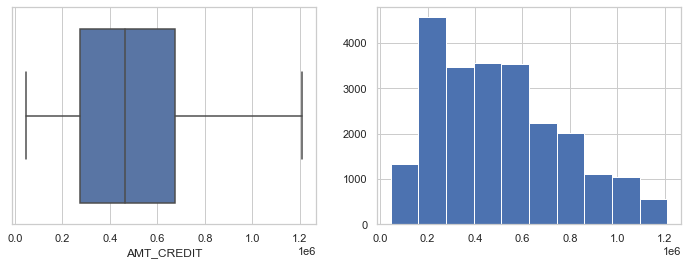

In [91]:
#### Plotting the data to see the Loan Amt for defaulters
######Plotting the data to see the Income Range of Defaulters
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
sns.boxplot(loan_data_correctedCreditAmtTarget1['AMT_CREDIT'],orient='v')
plt.subplot(1,2,2)
plt.hist(x=loan_data_correctedCreditAmtTarget1['AMT_CREDIT']);
plt.show()

In [92]:
loan_data_Target1[(loan_data_Target1['AMT_CREDIT'] > 200000) & (loan_data_Target1['AMT_CREDIT'] < 600000) ].shape[0]/loan_data_Target1.shape[0]

0.5493655589123867

Around 55 % of the population have Amount credit ranges from 2 lakh to 6 lakh

In [93]:
##### Checking for Children Count column : 
loan_data['CNT_CHILDREN'].value_counts(normalize=True)

0     0.700368
1     0.198754
2     0.086986
3     0.012087
4     0.001395
5     0.000273
6     0.000068
7     0.000023
14    0.000010
19    0.000007
12    0.000007
10    0.000007
9     0.000007
8     0.000007
11    0.000003
Name: CNT_CHILDREN, dtype: float64

In [94]:
###### More than 99 % of the data has less than 5 children 
loan_data[loan_data['CNT_CHILDREN'] > 5].shape[0]

42

In [95]:
#### For better analysis We will consider the loan dataset with less than 5 children into a subset dataframe

loan_data[loan_data['CNT_CHILDREN'] > 5].shape[0]/loan_data.shape[0]
loan_data_byChildren = loan_data[loan_data['CNT_CHILDREN'] < 5]

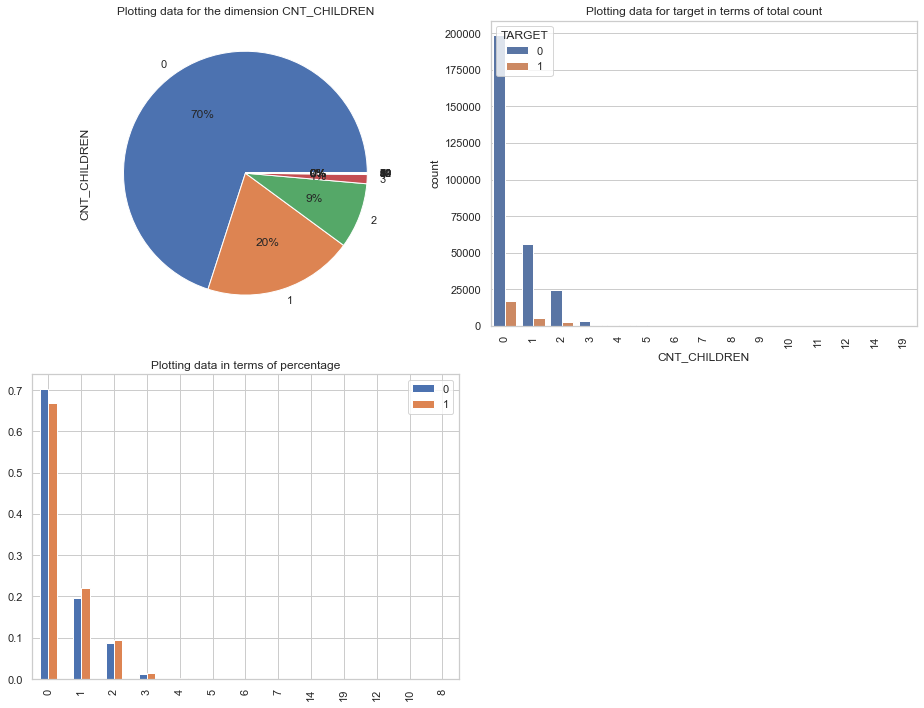

In [96]:
#### Plotting for number of Children:
plot_func(loan_data,'CNT_CHILDREN')

People who has no childeren dont face paying difficulties.
Whereas, we can see difficulties arise as the no of children increases.

In [97]:
#### Checking for number of Years Employed outliers
loan_data['YearsWorked'].value_counts(normalize=True)

1     0.283613
2     0.096390
0     0.090572
3     0.081626
4     0.070814
5     0.052961
6     0.048922
7     0.042805
8     0.037238
9     0.029183
10    0.023970
11    0.019199
12    0.017277
14    0.015125
13    0.014130
15    0.008891
16    0.007577
17    0.006536
18    0.006231
19    0.006084
20    0.005210
21    0.004754
22    0.004071
23    0.003314
24    0.002976
25    0.002670
27    0.002133
26    0.002124
28    0.001980
29    0.001847
30    0.001489
31    0.001418
34    0.001187
32    0.001141
33    0.001076
35    0.000832
36    0.000637
37    0.000452
39    0.000406
38    0.000377
40    0.000192
41    0.000192
42    0.000137
44    0.000098
43    0.000062
45    0.000049
46    0.000013
48    0.000013
47    0.000003
49    0.000003
Name: YearsWorked, dtype: float64

In [98]:
loan_data_Target1['YearsWorked'].value_counts(normalize=True)

1     0.266667
2     0.127895
0     0.123303
3     0.102598
4     0.080040
5     0.053454
6     0.046485
7     0.038550
8     0.031581
9     0.022840
10    0.018812
11    0.013535
12    0.011722
14    0.010352
13    0.009789
15    0.005398
16    0.004512
17    0.003988
18    0.003746
19    0.003545
21    0.002981
20    0.002699
22    0.002216
23    0.002095
24    0.001974
25    0.001611
28    0.001249
29    0.001128
30    0.000886
32    0.000765
26    0.000725
31    0.000604
27    0.000604
34    0.000483
33    0.000483
35    0.000242
39    0.000161
36    0.000121
38    0.000081
37    0.000040
44    0.000040
Name: YearsWorked, dtype: float64

In [99]:
loan_data_Target0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Age,Age_Group,YearsWorked
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,0,1,0,Core staff,2,1,1,MONDAY,11,0,0,School,45,41 to 50,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,Government,52,51 to 60,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,0,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,Business Entity Type 3,52,51 to 60,8
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,0,0,0,Core staff,1,2,2,THURSDAY,11,1,1,Religion,54,51 to 60,8
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,0,Laborers,2,2,2,WEDNESDAY,16,0,0,Other,46,41 to 50,4


In [100]:
loan_data_Target0.shape

(282686, 36)

In [101]:
loan_data_Target1.shape

(24825, 36)

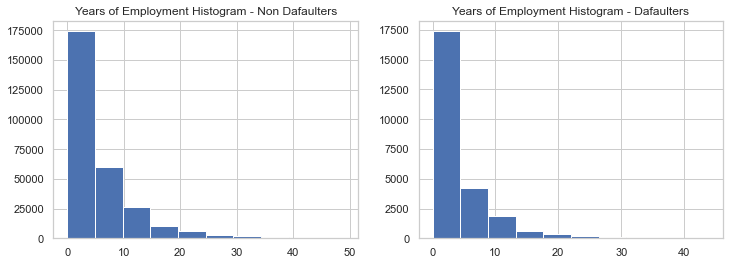

In [102]:
#### Plotting the data to see the Years of Employment for Dafaulters and NonDefaulters
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.title("Years of Employment Histogram - Non Dafaulters")
plt.hist(x=loan_data_Target0['YearsWorked']);
plt.subplot(1,2,2)
plt.title("Years of Employment Histogram - Dafaulters")
plt.hist(x=loan_data_Target1['YearsWorked']);
plt.show()

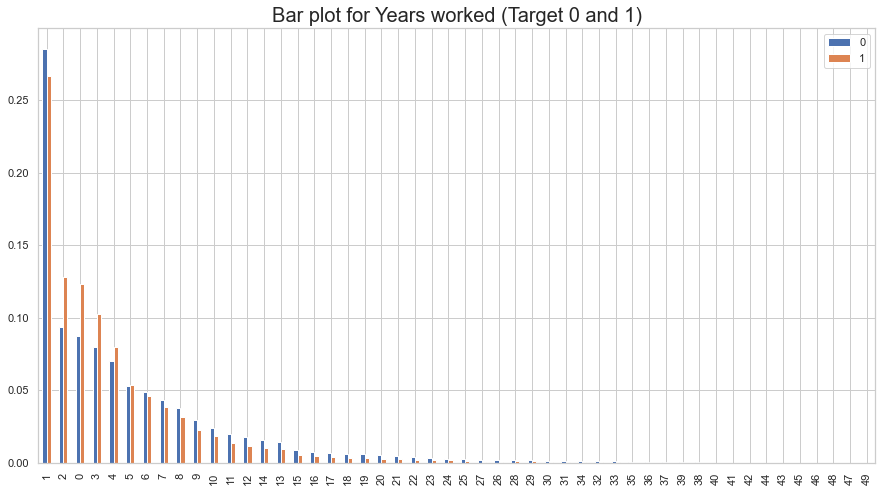

In [103]:
##### As the number of clients > 10 years is less in count . Considering only < 10 years client
df_YearsEmployed=pd.DataFrame()
df_YearsEmployed['0'] = ((loan_data_Target0['YearsWorked'].value_counts())/len(loan_data_Target0))
df_YearsEmployed['1'] = ((loan_data_Target1['YearsWorked'].value_counts())/len(loan_data_Target1))
df_YearsEmployed.plot(kind='bar',figsize=(15,8))
plt.title('Bar plot for Years worked (Target 0 and 1)', fontdict={'fontsize':20})
plt.xticks(rotation=90)
plt.show()

We can see that people in the beginning phase of their career i.e experience between 1 -5 years face paying difficulties.
And the experienced people once well settled and with good salary dont face much paying difficulties.

### Bivariate Analysis

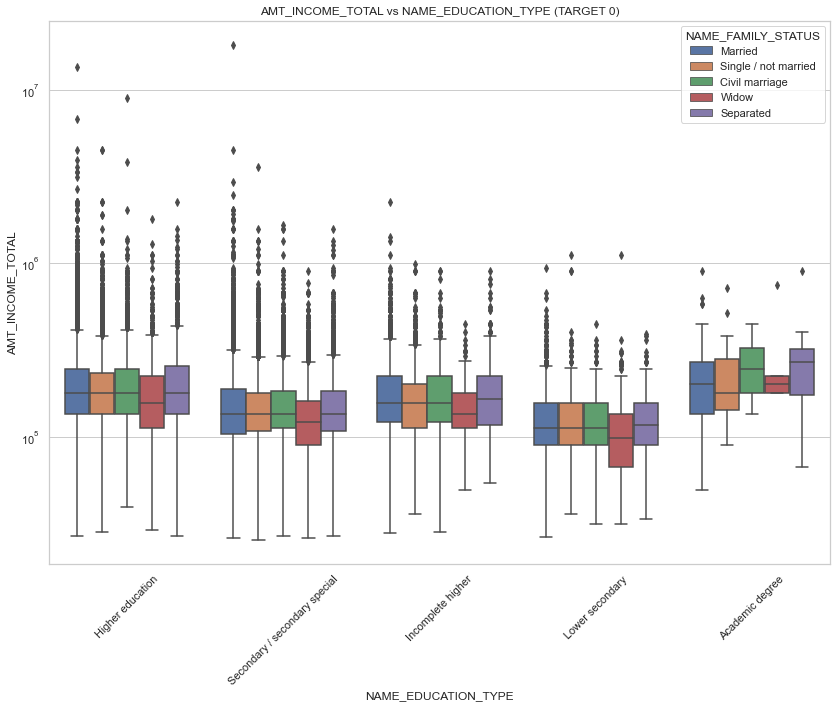

In [104]:
# Bivariate Analysis

plt.figure(figsize=(14,10))
plt.xticks(rotation=45)
plt.ticklabel_format(style = 'plain')
plt.yscale('log')
sns.boxplot(data =loan_data_Target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('AMT_INCOME_TOTAL vs NAME_EDUCATION_TYPE (TARGET 0)')
plt.show()

For non defaulters : Education Type with Higher education and 'Secondary/secondary special' Amount income total is mostly equal among the family status. These two education type has many outliers as well. Academic degree education type have less outliers and also their amount income total seems to be little on higher side.

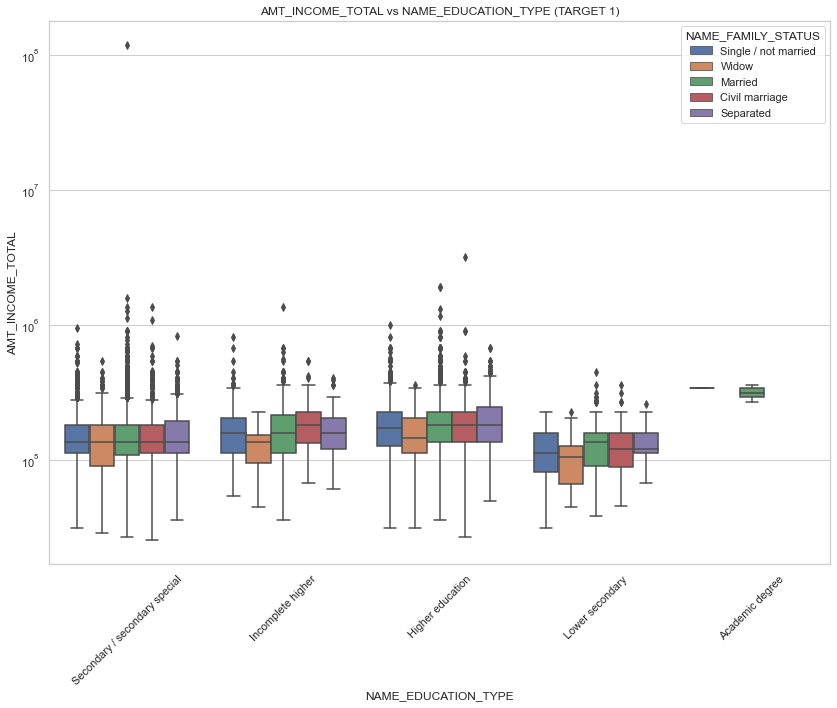

In [105]:
plt.figure(figsize=(14,10))
plt.xticks(rotation=45)
plt.ticklabel_format(style = 'plain')
plt.yscale('log')
sns.boxplot(data =loan_data_Target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('AMT_INCOME_TOTAL vs NAME_EDUCATION_TYPE (TARGET 1)')
plt.show()

For Defaulters : Education Type with 'Secondary/secondary special' and 'Higher education' Amount income total is mostly equal among the family status. These two education type has many outliers as well. Academic degree education type have less outliers and also their amount income total seems to be on higher side.

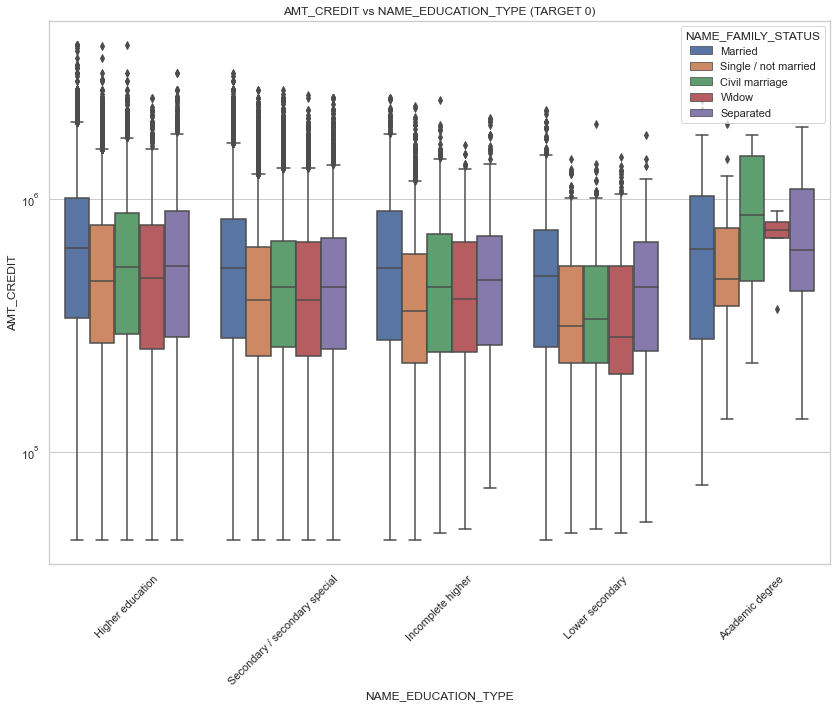

In [106]:
plt.figure(figsize=(14,10))
plt.xticks(rotation=45)
plt.ticklabel_format(style = 'plain')
plt.yscale('log')
sns.boxplot(data =loan_data_Target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('AMT_CREDIT vs NAME_EDUCATION_TYPE (TARGET 0)')
plt.show()

For Non Defaulters : Academic degree education type have less outliers and also family status of Married, civil marriage and seperated have higher Amount Credits. Whereas, Higher education and Secondary/secondary special group have many outliers

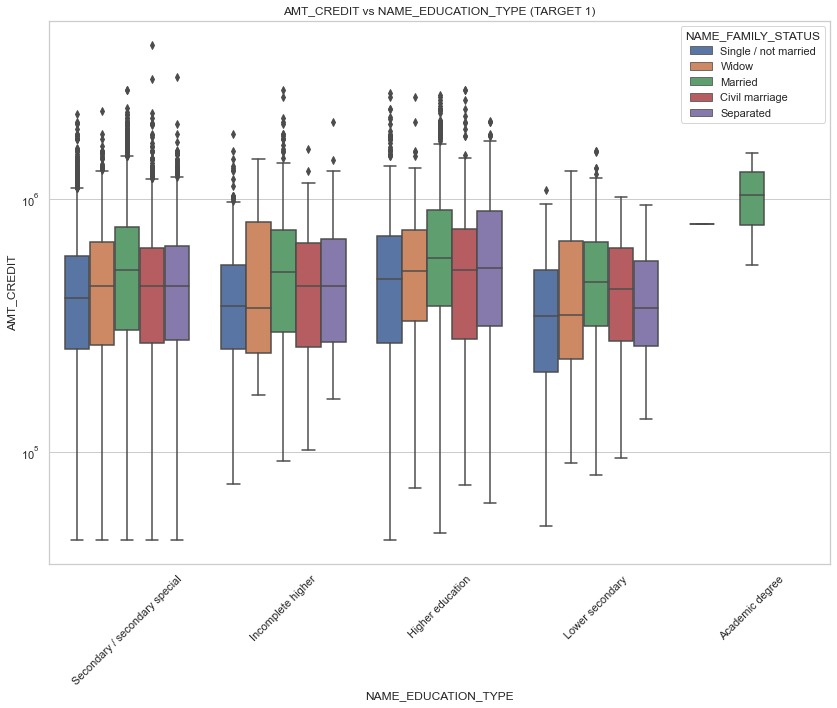

In [107]:
plt.figure(figsize=(14,10))
plt.xticks(rotation=45)
plt.ticklabel_format(style = 'plain')
plt.yscale('log')
sns.boxplot(data =loan_data_Target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('AMT_CREDIT vs NAME_EDUCATION_TYPE (TARGET 1)')
plt.show()

For Defaulters : Most of the outliers are from Education type 'Secondary/secondary special', 'Incomplete higher' and 'Higher education'. Very few outliers observed for Lower secondary and Academic. Single, civil marriage and seperated family status group has almost similar amount credit under Seondary/secondary special status.

In [108]:
num_col

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'],
      dtype='object')

In [109]:
cat_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

### Correlation 

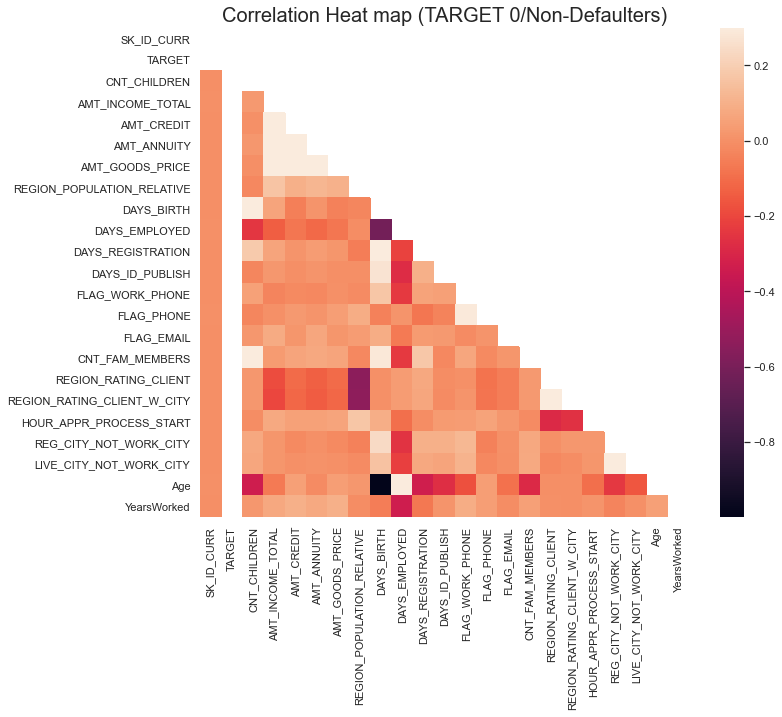

In [110]:
# Top 10 positive or negative Correlation for target 0 for all numerical columns in loan data

corr0 = loan_data_Target0.corr()
mask0 = np.zeros_like(corr0)
mask0[np.triu_indices_from(mask0)]= True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style('white'):
    ax= sns.heatmap(corr0, mask=mask0, vmax=.3, square=True)
    plt.title('Correlation Heat map (TARGET 0/Non-Defaulters)',fontdict={'fontsize':20})
    plt.show()

In [111]:
a = loan_data_Target0.corr().abs().unstack().dropna()

In [112]:
a = a[~(a==1.0)]

#### Top 10 correlation (positive or negative) for Non-defaulters - Target 0

In [113]:
round(a.sort_values(kind='quicksort').drop_duplicates().tail(10).sort_values(ascending=False)*100,2)

DAYS_BIRTH                   Age                       99.97
AMT_CREDIT                   AMT_GOODS_PRICE           98.70
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT      95.01
CNT_FAM_MEMBERS              CNT_CHILDREN              87.86
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY    83.04
AMT_GOODS_PRICE              AMT_ANNUITY               77.64
AMT_CREDIT                   AMT_ANNUITY               77.13
DAYS_BIRTH                   DAYS_EMPLOYED             61.80
DAYS_EMPLOYED                Age                       61.80
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT      53.90
dtype: float64

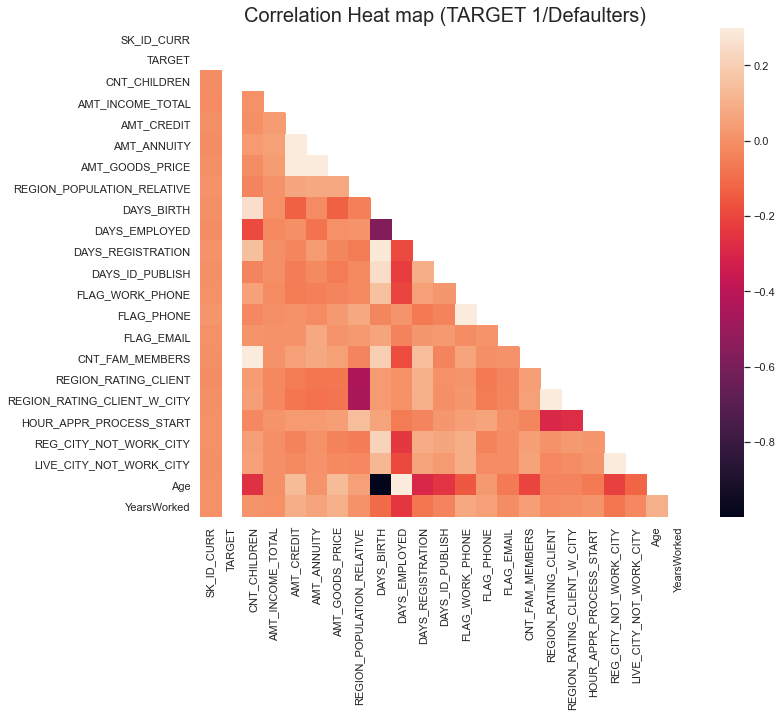

In [114]:
# Top 10 positive or negative Correlation for target 1 for all numerical 

corr1 = loan_data_Target1.corr()
mask1 = np.zeros_like(corr1)
mask1[np.triu_indices_from(mask1)]= True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style('white'):
    ax= sns.heatmap(corr1, mask=mask1, vmax=.3, square=True)
    plt.title('Correlation Heat map (TARGET 1/Defaulters)',fontdict={'fontsize':20})
    plt.show()

In [115]:
b = loan_data_Target1.corr().abs().unstack().dropna()

In [116]:
b = b[~(b==1.0)]

#### Top 10 correlation (positive or negative) for Defaulters - Target 1

In [117]:
round(b.sort_values(kind='quicksort').drop_duplicates().tail(10).sort_values(ascending=False)*100,2)

DAYS_BIRTH                   Age                            99.97
AMT_CREDIT                   AMT_GOODS_PRICE                98.28
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           95.66
CNT_FAM_MEMBERS              CNT_CHILDREN                   88.55
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        77.85
AMT_ANNUITY                  AMT_GOODS_PRICE                75.23
                             AMT_CREDIT                     75.22
Age                          DAYS_EMPLOYED                  57.53
DAYS_BIRTH                   DAYS_EMPLOYED                  57.51
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT_W_CITY    44.70
dtype: float64

## Previous Application data analysis

In [118]:
prev_appl_data = pd.read_csv("previous_application.csv")

In [119]:
prev_appl_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
# Check the number of rows and columns in the dataframe

prev_appl_data.shape

(1670214, 37)

In [121]:
# Check the column-wise info of the dataframe

prev_appl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

##### Cleaning of Previous Application Data

In [122]:
((prev_appl_data.isnull().sum() / prev_appl_data.shape[0]) * 100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

In [123]:
dropColListPrevApp = list(prev_appl_data.columns[((prev_appl_data.isnull().sum()/prev_appl_data.index.size)*100) >= 40])

In [124]:
dropColListPrevApp

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [125]:
prev_appl_data.drop(columns=dropColListPrevApp,inplace=True)

In [126]:
((prev_appl_data.isnull().sum() / prev_appl_data.shape[0]) * 100).sort_values(ascending=False)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_CASH_LOAN_PURPOSE          0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_APPLICATION                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_YIELD_GROUP                0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDU

In [127]:
prev_appl_data.shape

(1670214, 26)

In [128]:
for c in prev_appl_data.select_dtypes('object').columns:
    print(prev_appl_data[c].value_counts(normalize=True)*100)

Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                 0.020716
Name: NAME_CONTRACT_TYPE, dtype: float64
TUESDAY      15.274570
WEDNESDAY    15.268103
MONDAY       15.181109
FRIDAY       15.090761
THURSDAY     14.914197
SATURDAY     14.407196
SUNDAY        9.864065
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64
Y    99.49258
N     0.50742
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64
XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Pur

In [129]:
prev_appl_data.NAME_YIELD_GROUP.value_counts(normalize=True)*100

XNA           30.966990
middle        23.082791
high          21.154834
low_normal    19.284655
low_action     5.510731
Name: NAME_YIELD_GROUP, dtype: float64

In [130]:
# more than 30 % value have XNA data in NAME_YIELD_GROUP column, we can drop this column
prev_appl_data.drop(columns=['NAME_YIELD_GROUP'], inplace=True)

In [131]:
prev_appl_data.NAME_SELLER_INDUSTRY.value_counts(normalize=True)*100

XNA                     51.234153
Consumer electronics    23.845148
Connectivity            16.526565
Furniture                3.463568
Construction             1.783065
Clothing                 1.433888
Industry                 1.149194
Auto technology          0.298764
Jewelry                  0.162195
MLM partners             0.072745
Tourism                  0.030715
Name: NAME_SELLER_INDUSTRY, dtype: float64

In [132]:
prev_appl_data.drop(columns=['NAME_SELLER_INDUSTRY'], inplace=True)

In [133]:
prev_appl_data.NAME_PORTFOLIO.value_counts(normalize=True)*100

POS      41.372603
Cash     27.634962
XNA      22.286366
Cards     8.680624
Cars      0.025446
Name: NAME_PORTFOLIO, dtype: float64

In [134]:
prev_appl_data.drop(columns='NAME_PORTFOLIO', inplace=True)

In [135]:
prev_appl_data.NAME_GOODS_CATEGORY.value_counts(normalize=True)*100

XNA                         56.927376
Mobile                      13.453845
Consumer Electronics         7.279067
Computers                    6.332662
Audio/Video                  5.953788
Furniture                    3.212522
Photo / Cinema Equipment     1.498072
Construction Materials       1.496515
Clothing and Accessories     1.410238
Auto Accessories             0.441919
Jewelry                      0.376598
Homewares                    0.300740
Medical Supplies             0.230090
Vehicles                     0.201771
Sport and Leisure            0.178480
Gardening                    0.159740
Other                        0.152915
Office Appliances            0.139683
Tourism                      0.099329
Medicine                     0.092802
Direct Sales                 0.026703
Fitness                      0.012513
Additional Service           0.007664
Education                    0.006406
Weapon                       0.004610
Insurance                    0.003832
Animals     

In [136]:
prev_appl_data.drop(columns=['NAME_GOODS_CATEGORY'], inplace=True)

In [137]:
prev_appl_data.NAME_CLIENT_TYPE.value_counts(normalize=True)*100

Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: NAME_CLIENT_TYPE, dtype: float64

In [138]:
prev_appl_data.NAME_CLIENT_TYPE.mode()[0]

'Repeater'

In [139]:
prev_appl_data.NAME_CLIENT_TYPE.replace('XNA',prev_appl_data.NAME_CLIENT_TYPE.mode()[0], inplace=True)

In [140]:
prev_appl_data.CODE_REJECT_REASON.value_counts(normalize=True)*100

XAP       81.013152
HC        10.491530
LIMIT      3.333705
SCO        2.243245
CLIENT     1.582791
SCOFR      0.767027
XNA        0.313972
VERIF      0.211650
SYSTEM     0.042929
Name: CODE_REJECT_REASON, dtype: float64

In [141]:
prev_appl_data.drop(columns=['CODE_REJECT_REASON'], inplace=True)

In [142]:
prev_appl_data.NAME_PAYMENT_TYPE.value_counts(normalize=True)*100

Cash through the bank                        61.881412
XNA                                          37.563091
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: NAME_PAYMENT_TYPE, dtype: float64

In [143]:
prev_appl_data.drop(columns=['NAME_PAYMENT_TYPE'], inplace=True)

In [144]:
prev_appl_data.shape

(1670214, 20)

In [145]:
prev_appl_data.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100

Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                 0.020716
Name: NAME_CONTRACT_TYPE, dtype: float64

In [146]:
prev_appl_data.NAME_CONTRACT_TYPE.mode()[0]

'Cash loans'

In [147]:
prev_appl_data.NAME_CONTRACT_TYPE.replace('XNA',prev_appl_data.NAME_CONTRACT_TYPE.mode()[0], inplace=True)

In [148]:
prev_appl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 20 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [149]:
prev_appl_data.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS'>

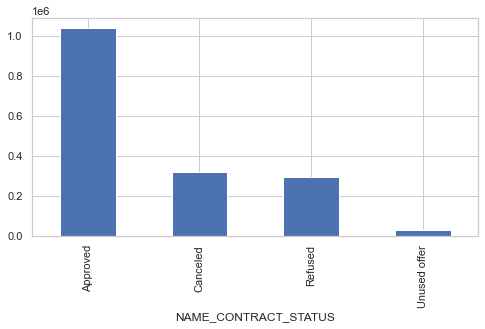

In [150]:
##### Knowing the % of columns that are approved,refused,cancelled
prev_appl_data.groupby('NAME_CONTRACT_STATUS')['SK_ID_PREV'].count().plot(kind='bar',figsize=(8,4))

In [151]:
#merging the application_data with previous application data
complete_loan_data = pd.merge(left=loan_data, right=prev_appl_data,how='inner', on='SK_ID_CURR',suffixes='_x')

In [152]:
complete_loan_data.shape

(1413701, 55)

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS'>

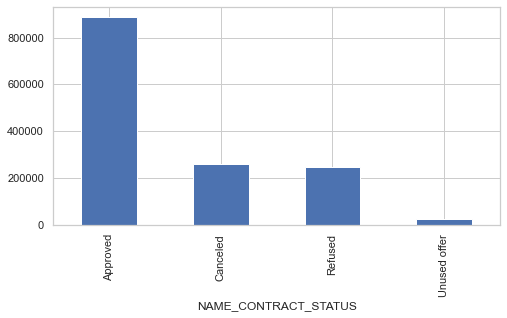

In [153]:
##### Knowing the % of columns that are approved,refused,cancelled
complete_loan_data.groupby('NAME_CONTRACT_STATUS')['SK_ID_CURR'].count().plot(kind='bar',figsize=(8,4))

Across complete loan data, Approved loans outnumbered Canceled, Refused and Unused offer.

In [154]:
#### Dividing the data based on the Contract Status:
complete_loan_data_Approved = complete_loan_data[complete_loan_data['NAME_CONTRACT_STATUS'] == 'Approved']
complete_loan_data_Canceled = complete_loan_data[complete_loan_data['NAME_CONTRACT_STATUS'] == 'Canceled']
complete_loan_data_Refused = complete_loan_data[complete_loan_data['NAME_CONTRACT_STATUS'] == 'Refused']
complete_loan_data_Unused = complete_loan_data[complete_loan_data['NAME_CONTRACT_STATUS'] == 'Unused offer']

In [155]:
def plot_func1(dataframe,dim):
    fig = plt.figure(figsize=(13,10))
    ax1 = plt.subplot(221)
    dataframe[dim].value_counts().plot.pie(autopct = "%1.0f%%" , ax = ax1)
    plt.title("Plotting data for the dimension " + dim)
    ax2 = plt.subplot(222)
    sns.countplot(x=dim,hue='NAME_CONTRACT_STATUS',data=dataframe,ax=ax2)
    plt.xticks(rotation=90)
    plt.title("Plotting data for target in terms of total count")
    ax3 = plt.subplot(223)
    dfStatus=pd.DataFrame()
    dfStatus['Approved'] = ((complete_loan_data_Approved[dim].value_counts())/len(complete_loan_data_Approved))
    dfStatus['Canceled'] = ((complete_loan_data_Canceled[dim].value_counts())/len(complete_loan_data_Canceled))
    dfStatus['Refused'] = ((complete_loan_data_Refused[dim].value_counts())/len(complete_loan_data_Refused))
    dfStatus['Unused'] = ((complete_loan_data_Unused[dim].value_counts())/len(complete_loan_data_Unused))
    dfStatus.plot.bar(ax=ax3)
    plt.title("plotting data in terms of percentage")
    fig.tight_layout()
    plt.show()

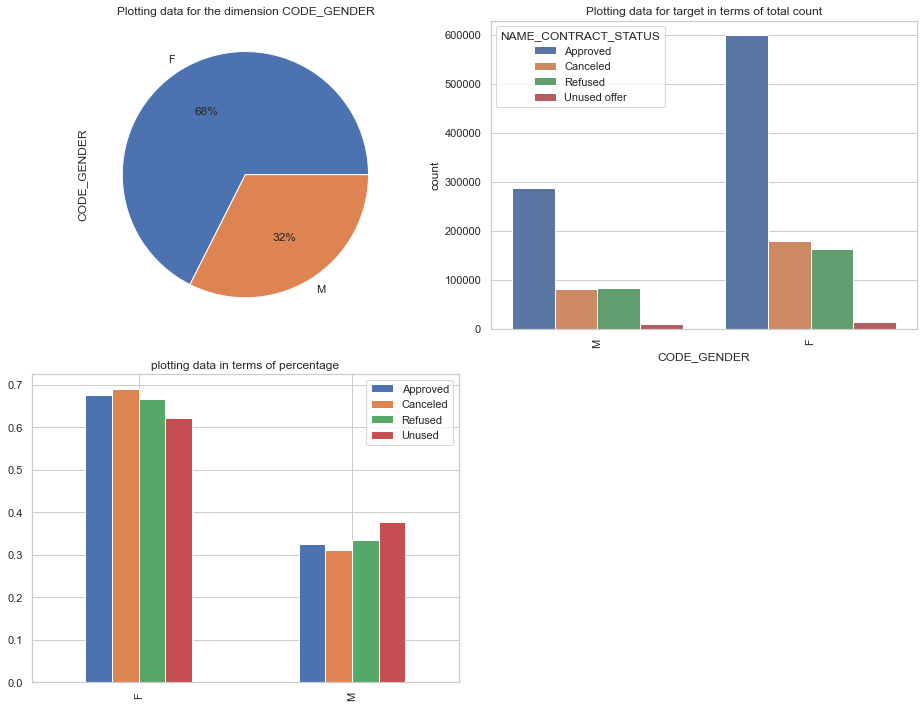

In [156]:
plot_func1(complete_loan_data,'CODE_GENDER')

Overall, female seems to have more number of application and also the Approval percentage is high for them. Even, the percentage for Canceled, refused and Unused status are on higher side for female as comapred to male.

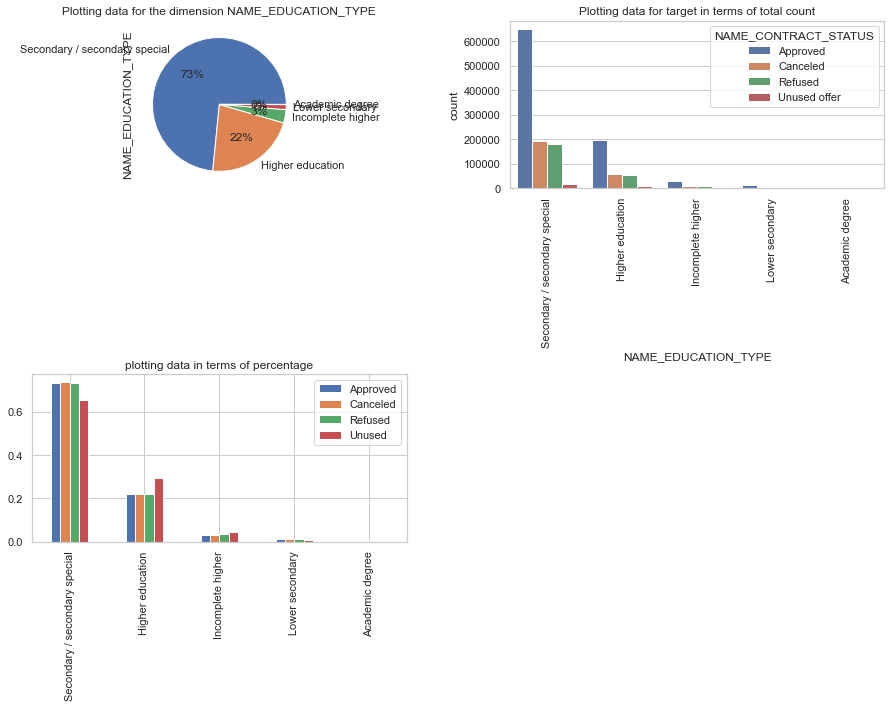

In [157]:
plot_func1(complete_loan_data,'NAME_EDUCATION_TYPE')

Secondary/secondary special education type has more percentage for approval, canceled and refused. For, higher education, Unused offer have higher percentage as compared to the other contract status.

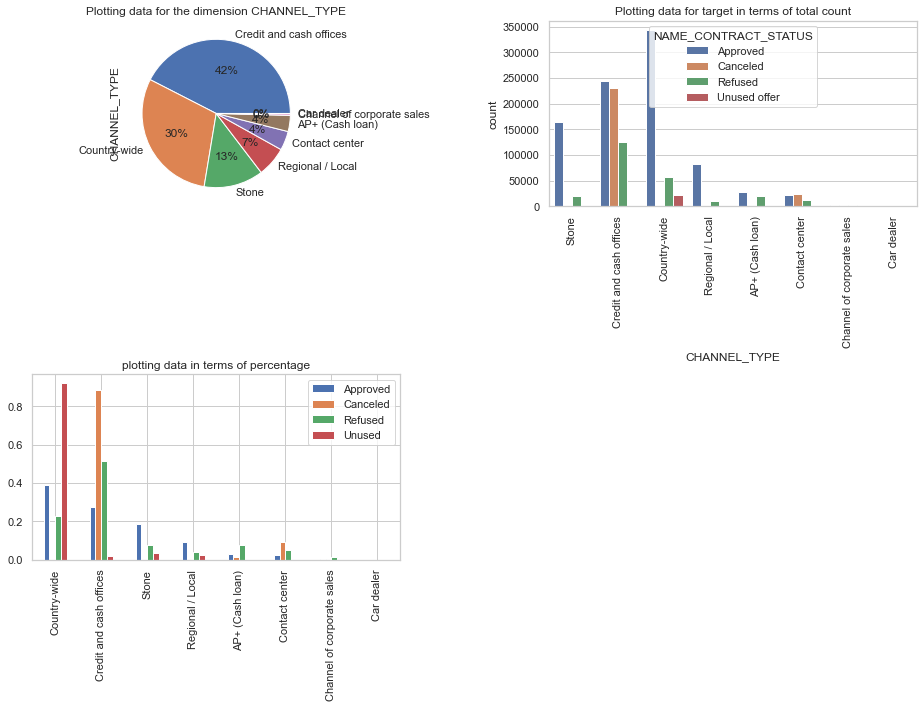

In [158]:
plot_func1(complete_loan_data,'CHANNEL_TYPE')

Approved loan percentage is more in Country-wide channel type. Unused loan and Canceled loan percentage is highest among Country-wide and Credit and cash offices respectively.

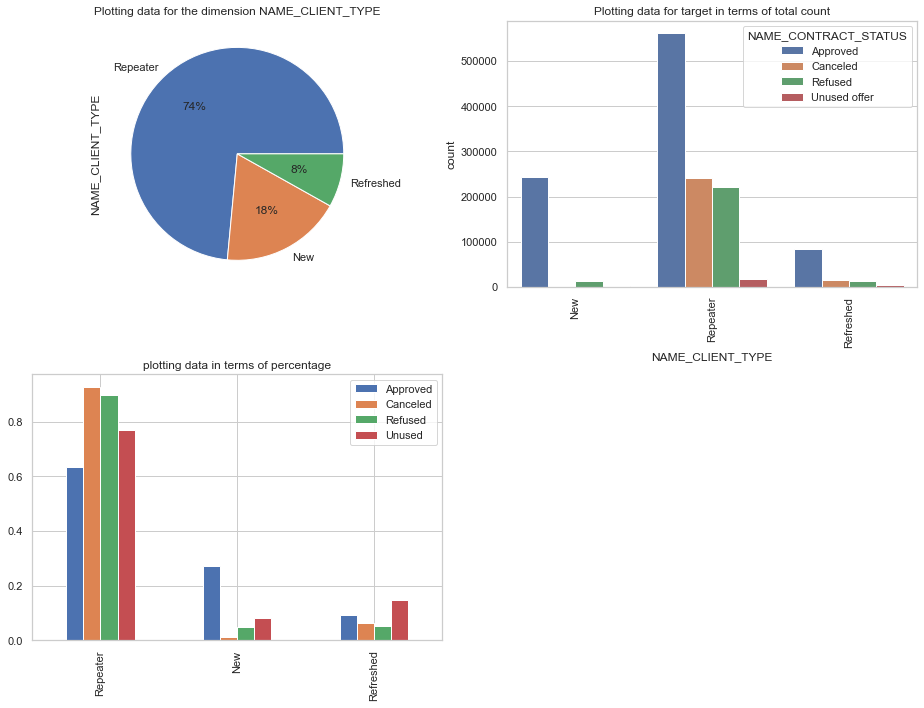

In [159]:
plot_func1(complete_loan_data,'NAME_CLIENT_TYPE')

Repeater client type seems to have more percentage of Canceled and Refused loan.

In [160]:
def plot3_func(var):
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
    
    s1=sns.countplot(ax=ax1,x=complete_loan_data_Approved[var], data=complete_loan_data_Approved)
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    ax1.set_title("Approved", fontsize=10) 
    ax1.set_xlabel(var)
    ax1.set_ylabel("Count of Loans")    
    
    s2=sns.countplot(ax=ax2,x=complete_loan_data_Canceled[var], data=complete_loan_data_Canceled)
    s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_title("Canceled", fontsize=10)
    ax2.set_xlabel(var)
    ax2.set_ylabel("Count of Loans")    
    
    s3=sns.countplot(ax=ax3,x=complete_loan_data_Refused[var], data=complete_loan_data_Refused)
    s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
    ax3.set_title("Refused", fontsize=10)
    ax3.set_xlabel(var)
    ax3.set_ylabel("Count of Loans")    
    plt.show()

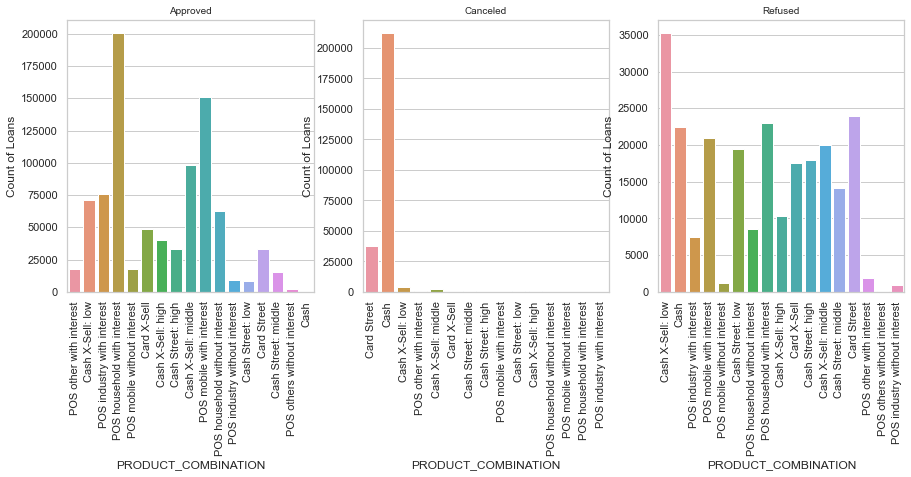

In [161]:
plot3_func('PRODUCT_COMBINATION')

POS household with interest product combination has more number of Approved loans. Whereas Cash product conbination has more no of Canceled loans. And, Cash X-Sell:low sees more no of Refused loans.

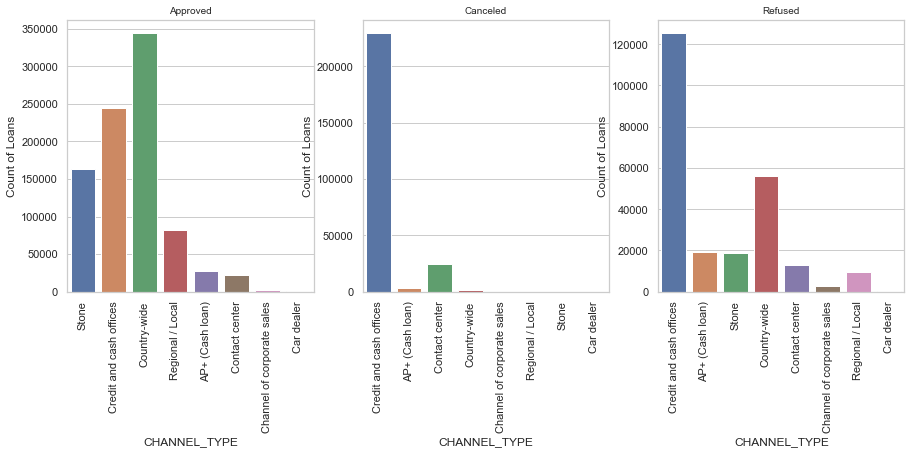

In [162]:
plot3_func('CHANNEL_TYPE')

Country-wide channel type sees more no of Approved loans. Whereas, Credit and cash offices channel type sees more number of Canceled and Refused loans.

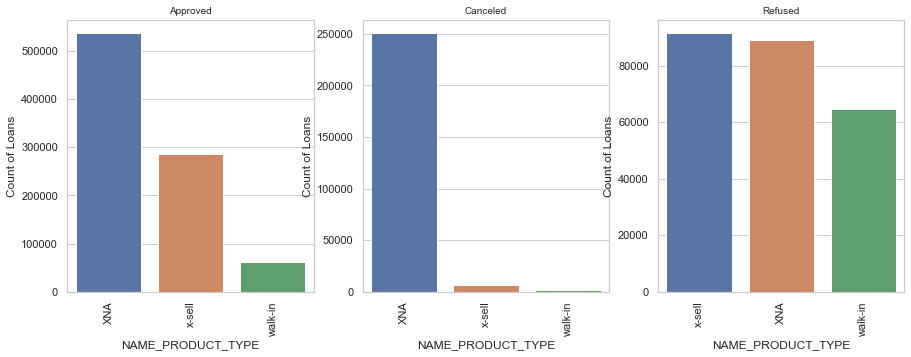

In [163]:
plot3_func('NAME_PRODUCT_TYPE')

X-sell product type have more no of Approved loans.

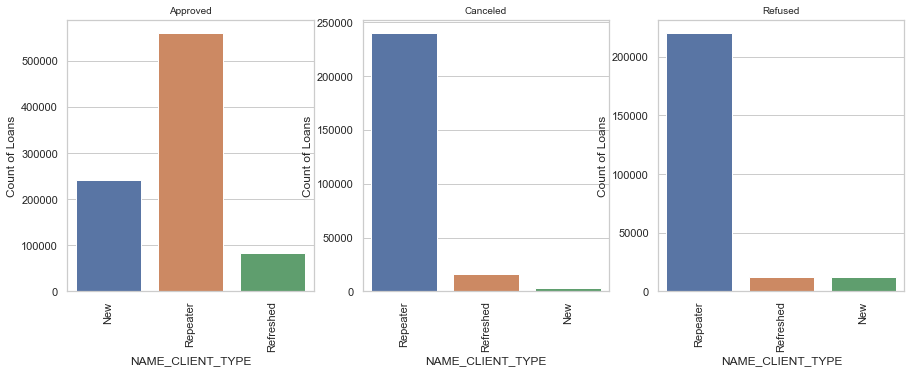

In [164]:
plot3_func('NAME_CLIENT_TYPE')

Repeater client type seems to have more number of loans across each Contract status

#### Correlation heatmap for Approved

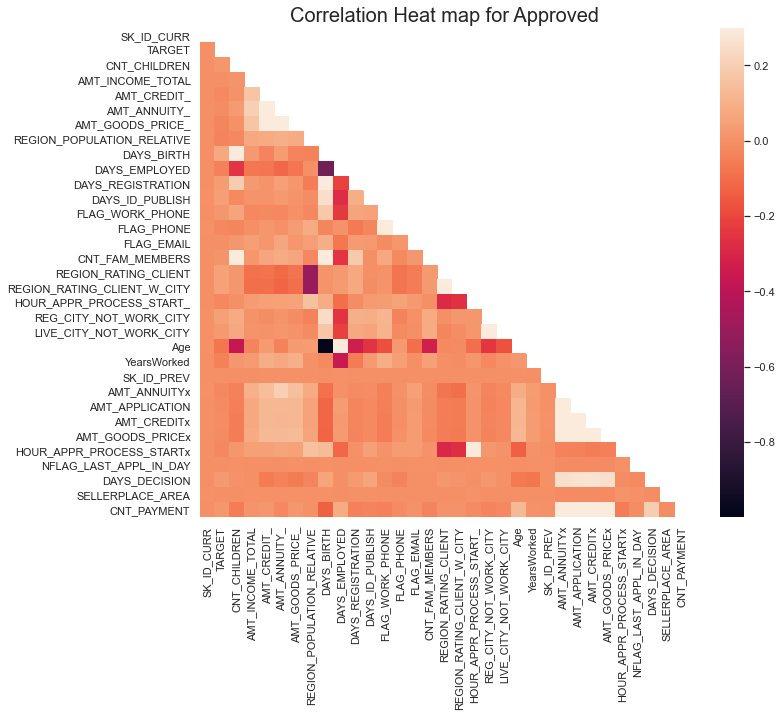

In [165]:
corr_a = complete_loan_data_Approved.corr()
mask_a = np.zeros_like(corr_a)
mask_a[np.triu_indices_from(mask_a)]= True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style('white'):
    ax= sns.heatmap(corr_a, mask=mask_a, vmax=.3, square=True)
    plt.title('Correlation Heat map for Approved',fontdict={'fontsize':20})
    plt.show()

In [166]:
approved_corr = complete_loan_data_Approved.corr().abs().unstack().dropna()
approved_corr = approved_corr[~(approved_corr==1.0)]
round(approved_corr.sort_values(kind='quicksort').drop_duplicates().tail(10).sort_values(ascending=False)*100,2)

DAYS_BIRTH              Age                            99.97
AMT_CREDITx             AMT_GOODS_PRICEx               99.33
AMT_GOODS_PRICE_        AMT_CREDIT_                    98.65
AMT_CREDITx             AMT_APPLICATION                96.18
REGION_RATING_CLIENT    REGION_RATING_CLIENT_W_CITY    94.26
CNT_FAM_MEMBERS         CNT_CHILDREN                   88.29
REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY        83.48
AMT_GOODS_PRICEx        AMT_ANNUITYx                   83.13
AMT_CREDITx             AMT_ANNUITYx                   82.65
AMT_ANNUITYx            AMT_APPLICATION                81.45
dtype: float64

#### Correlation heatmap for Canceled

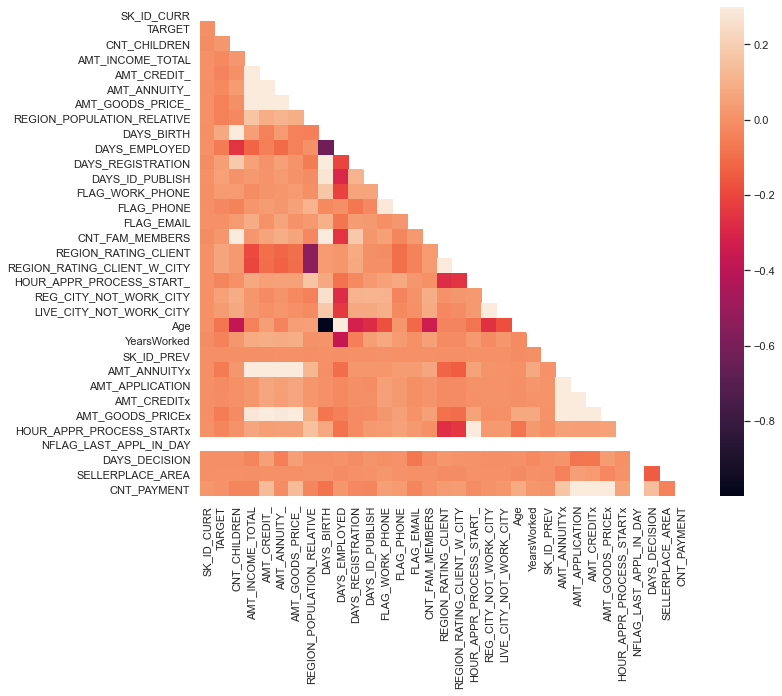

In [167]:
corr_c = complete_loan_data_Canceled.corr()
mask_c = np.zeros_like(corr_c)
mask_c[np.triu_indices_from(mask_c)]= True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style('white'):
    ax= sns.heatmap(corr_c, mask=mask_c, vmax=.3, square=True)
    plt.show()

In [168]:
canceled_corr = complete_loan_data_Canceled.corr().abs().unstack().dropna()
canceled_corr = canceled_corr[~(canceled_corr==1.0)]
canceled_corr.sort_values(kind='quicksort').drop_duplicates().tail(10).sort_values(ascending=False)*100

Age                          DAYS_BIRTH                 99.970706
AMT_CREDITx                  AMT_APPLICATION            99.682219
AMT_GOODS_PRICEx             AMT_CREDITx                99.164441
AMT_GOODS_PRICE_             AMT_CREDIT_                98.580722
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT       95.313889
CNT_CHILDREN                 CNT_FAM_MEMBERS            86.883077
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY    83.161710
AMT_APPLICATION              AMT_ANNUITYx               79.177422
AMT_ANNUITYx                 AMT_GOODS_PRICEx           79.157792
                             AMT_CREDITx                78.672586
dtype: float64

#### Correlation heatmap for Refused

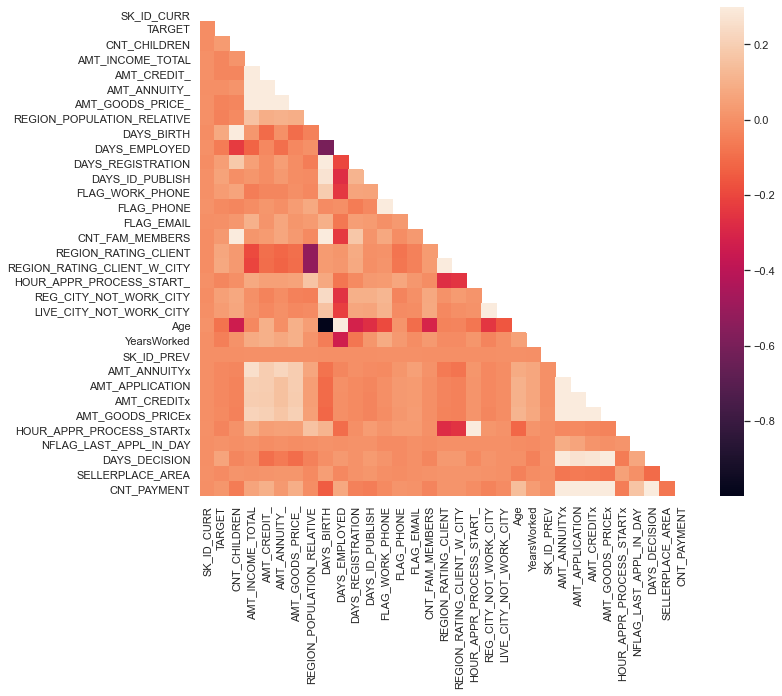

In [169]:
corr_r = complete_loan_data_Refused.corr()
mask_r = np.zeros_like(corr_r)
mask_r[np.triu_indices_from(mask_r)]= True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style('white'):
    ax= sns.heatmap(corr_r, mask=mask_r, vmax=.3, square=True)
    plt.show()

In [170]:
refused_corr = complete_loan_data_Refused.corr().abs().unstack().dropna()
refused_corr = refused_corr[~(refused_corr==1.0)]
refused_corr.sort_values(kind='quicksort').drop_duplicates().tail(10).sort_values(ascending=False)*100

DAYS_BIRTH                   Age                       99.971128
AMT_GOODS_PRICEx             AMT_APPLICATION           99.966561
                             AMT_CREDITx               99.184204
AMT_CREDIT_                  AMT_GOODS_PRICE_          98.482102
AMT_CREDITx                  AMT_APPLICATION           98.368351
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT      94.727166
CNT_FAM_MEMBERS              CNT_CHILDREN              87.416672
AMT_GOODS_PRICEx             AMT_ANNUITYx              82.529634
AMT_ANNUITYx                 AMT_CREDITx               82.305435
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY    82.111967
dtype: float64

#### Correlation heatmap for Unused

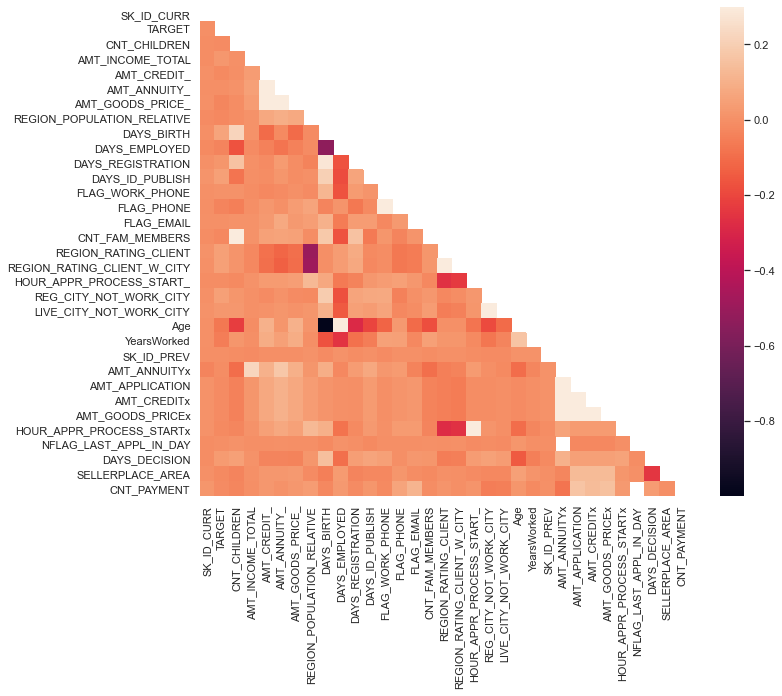

In [171]:
corr_u = complete_loan_data_Unused.corr()
mask_u = np.zeros_like(corr_u)
mask_u[np.triu_indices_from(mask_u)]= True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style('white'):
    ax= sns.heatmap(corr_u, mask=mask_u, vmax=.3, square=True)
    plt.show()

In [172]:
unused_corr = complete_loan_data_Unused.corr().abs().unstack().dropna()
unused_corr = unused_corr[~(unused_corr==1.0)]
unused_corr.sort_values(kind='quicksort').drop_duplicates().tail(10).sort_values(ascending=False)*100

AMT_CREDITx             AMT_GOODS_PRICEx               99.996673
                        AMT_APPLICATION                99.975790
Age                     DAYS_BIRTH                     99.964400
AMT_CREDIT_             AMT_GOODS_PRICE_               98.592101
REGION_RATING_CLIENT    REGION_RATING_CLIENT_W_CITY    95.837347
AMT_CREDITx             AMT_ANNUITYx                   94.030530
AMT_ANNUITYx            AMT_GOODS_PRICEx               93.989881
                        AMT_APPLICATION                93.723049
CNT_CHILDREN            CNT_FAM_MEMBERS                89.096487
REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY        81.347272
dtype: float64

# Conclusion

*** Banks should focus more on education type 'Higher education' and avoid Secondary/secondary special, incomplete higher or lower secondary as they face paying difficulties.**

*** Avoid income type of 'Working' clients as they have high percentage of paying difficulties. Instead focus on Commercial associate, pensioner and State servant.**

*** Focus on clients from housing type ‘House/apartment’ as they are having less paying difficulties.**

*** Bank should focus 'Country-wide' channel type sees more no of Approved loans. Whereas, Credit and cash offices channel type sees more number of Canceled and Refused loans.**

*** Banks should focus on the client from age group of 41 to 70 as they will be financial stable and shows less paying difficulties.**